In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-analytics-ue-22-cs-342-aa-2-hackathon-2/sample_submission.csv
/kaggle/input/data-analytics-ue-22-cs-342-aa-2-hackathon-2/train.csv
/kaggle/input/data-analytics-ue-22-cs-342-aa-2-hackathon-2/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/data-analytics-ue-22-cs-342-aa-2-hackathon-2/train.csv")
test = pd.read_csv("/kaggle/input/data-analytics-ue-22-cs-342-aa-2-hackathon-2/test.csv")

In [3]:
train.head()

timestamp  average_fare  rides_completed  driver_availability  \
0  2021-01-01 00:00:00     20.780423              457            49.170948   
1  2021-01-01 00:00:00     90.000000               80            30.000000   
2  2021-01-01 00:00:00     41.197085              239            39.110219   
3  2021-01-01 01:00:00     20.772227              141            30.000000   
4  2021-01-01 01:00:00     90.969805               98            30.000000   

   surge_multiplier vehicle_type weather  traffic_index  special_event  
0               1.0         bike   Clear             63              0  
1               1.0          car   Clear             53              0  
2               1.0         auto   Clear             35              0  
3               1.5         bike  Stormy             83              0  
4               1.0          car   Clear             26              0

### Task 1: Data Exploration and Preparation (1 mark)

- Conduct exploratory data analysis to identify trends, patterns, and anomalies in fare data for each vehicle type (bikes, autos, and cars) in Quahog City.
- Using appropriate visualizations and techniques, provide an in-depth analysis on the nature of the average fare and other features in the dataset.

First few rows of the dataset:


timestamp  average_fare  rides_completed  driver_availability  \
0  2021-01-01 00:00:00     20.780423              457            49.170948   
1  2021-01-01 00:00:00     90.000000               80            30.000000   
2  2021-01-01 00:00:00     41.197085              239            39.110219   
3  2021-01-01 01:00:00     20.772227              141            30.000000   
4  2021-01-01 01:00:00     90.969805               98            30.000000   

   surge_multiplier vehicle_type weather  traffic_index  special_event  
0               1.0         bike   Clear             63              0  
1               1.0          car   Clear             53              0  
2               1.0         auto   Clear             35              0  
3               1.5         bike  Stormy             83              0  
4               1.0          car   Clear             26              0


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63015 entries, 0 to 63014
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            63015 non-null  object 
 1   average_fare         63015 non-null  float64
 2   rides_completed      63015 non-null  int64  
 3   driver_availability  63015 non-null  float64
 4   surge_multiplier     63015 non-null  float64
 5   vehicle_type         63015 non-null  object 
 6   weather              63015 non-null  object 
 7   traffic_index        63015 non-null  int64  
 8   special_event        63015 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 4.3+ MB

Summary Statistics:


average_fare  rides_completed  driver_availability  surge_multiplier  \
count  63015.000000     63015.000000         63015.000000      63015.000000   
mean      70.186256       376.739760            44.695420          1.253939   
std       39.465587       302.994799            15.321958          0.259068   
min       20.000000        10.000000            30.000000          1.000000   
25%       40.000000       146.000000            30.000000          1.000000   
50%       47.554098       287.000000            40.476311          1.215105   
75%      106.082575       550.000000            54.190376          1.400000   
max      161.963018      2614.000000           100.000000          3.400358   

       traffic_index  special_event  
count   63015.000000   63015.000000  
mean       59.514909       0.100294  
std        23.152674       0.300393  
min        20.000000       0.000000  
25%        39.000000       0.000000  
50%        59.000000       0.000000  
75%        80.000000       0.000000  
max        99.000000       1.000000


Missing values per column:


timestamp              0
average_fare           0
rides_completed        0
driver_availability    0
surge_multiplier       0
vehicle_type           0
weather                0
traffic_index          0
special_event          0
weather_numeric        0
dtype: int64

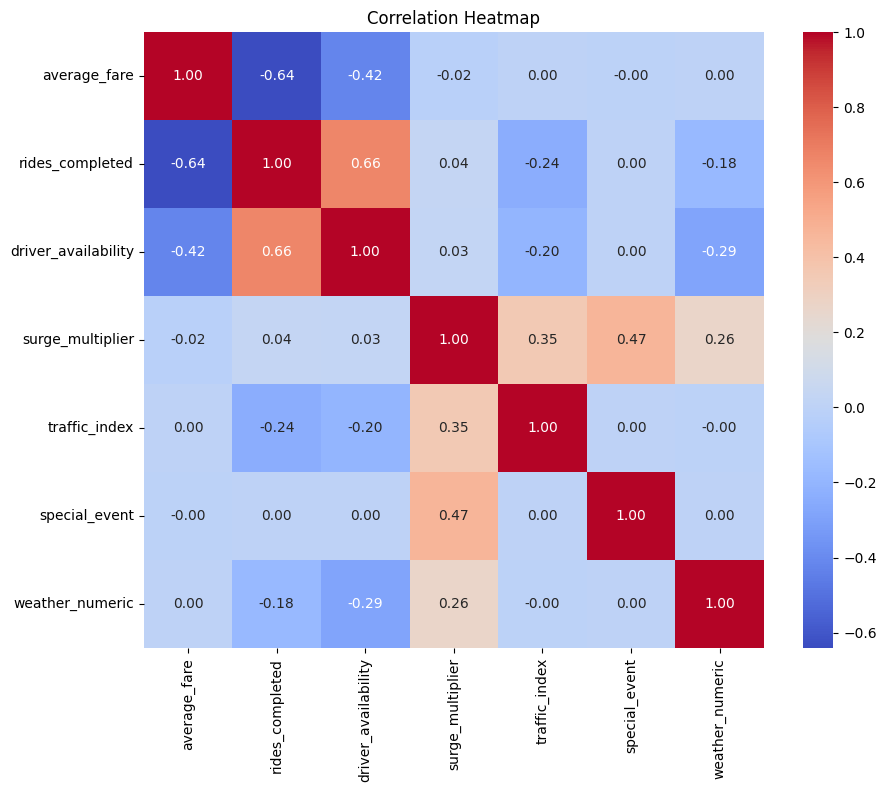

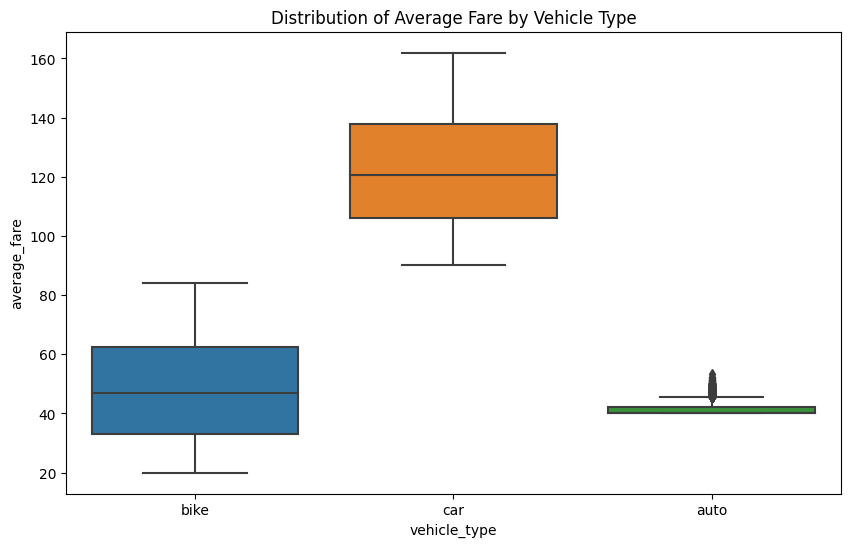

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

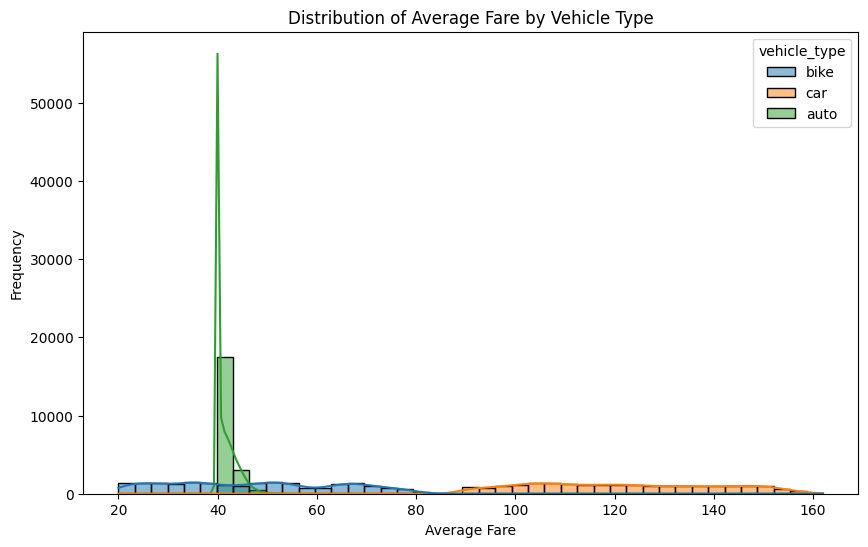

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

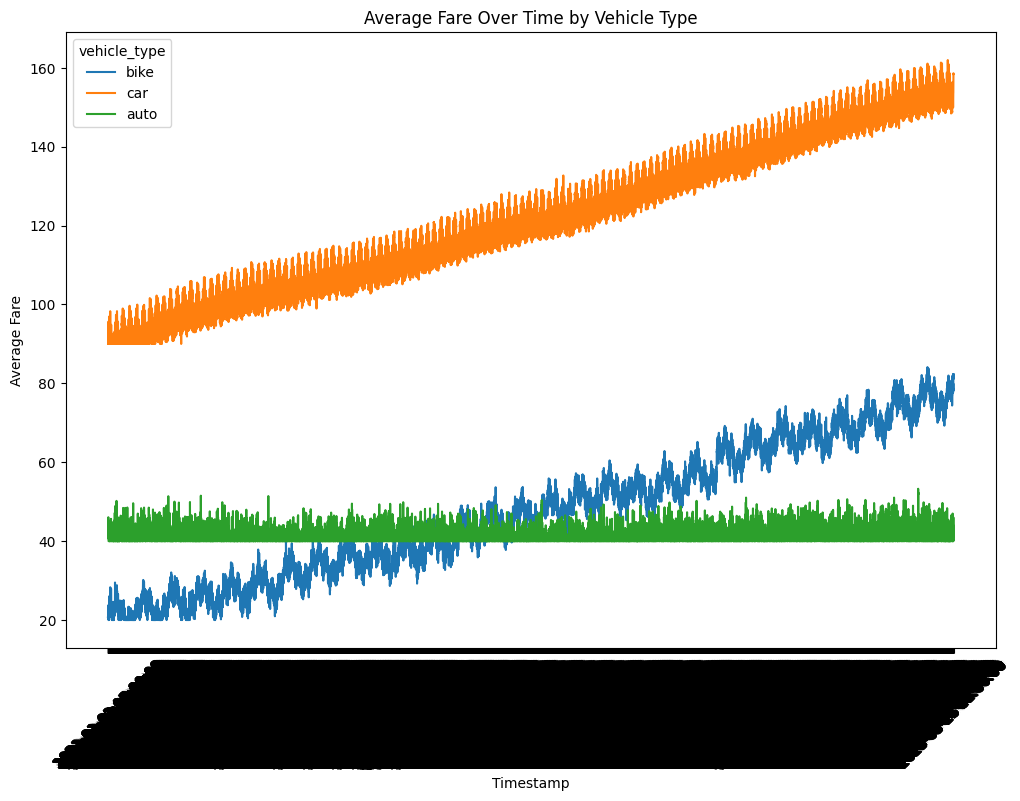

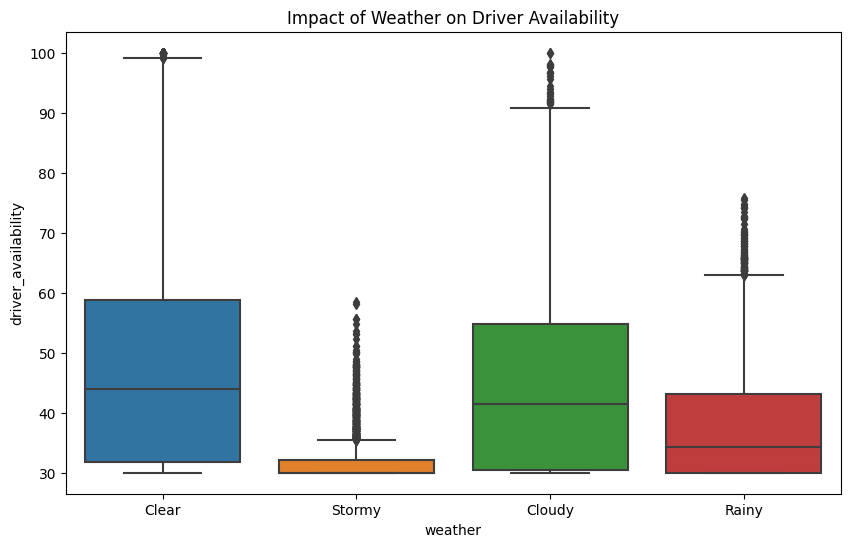

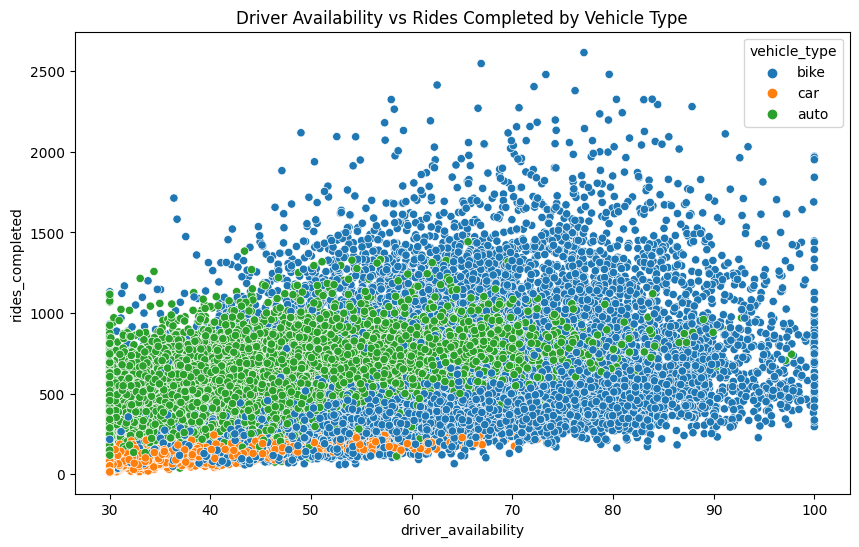

In [4]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Display the first few rows of the dataset
print("First few rows of the dataset:")
display(train.head())

# Display basic information and summary statistics
print("\nDataset Info:")
train.info()
print("\nSummary Statistics:")
display(train.describe())

# Convert 'weather' column to numeric for correlation analysis
weather_mapping = {'Clear': 0, 'Cloudy': 1, 'Rainy': 2, 'Stormy': 3}
train['weather_numeric'] = train['weather'].map(weather_mapping)

# Check for any missing values in the dataset
print("\nMissing values per column:")
display(train.isnull().sum())

# Exploratory plots to understand patterns and trends
# 1. Correlation Heatmap (Excluding 'timestamp' and 'vehicle_type' columns)
plt.figure(figsize=(10, 8))
numeric_cols = train.select_dtypes(include=[np.number]).columns  # Select only numeric columns
correlation_matrix = train[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 2. Distribution of average fare for each vehicle type
plt.figure(figsize=(10, 6))
sns.boxplot(data=train, x='vehicle_type', y='average_fare')
plt.title("Distribution of Average Fare by Vehicle Type")
plt.show()

# Distribution of average fare per vehicle type
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x="average_fare", hue="vehicle_type", kde=True)
plt.title("Distribution of Average Fare by Vehicle Type")
plt.xlabel("Average Fare")
plt.ylabel("Frequency")
plt.show()

# Time series plot of average fare over time for each vehicle type
plt.figure(figsize=(12, 8))
sns.lineplot(data=train, x="timestamp", y="average_fare", hue="vehicle_type")
plt.title("Average Fare Over Time by Vehicle Type")
plt.xlabel("Timestamp")
plt.ylabel("Average Fare")
plt.xticks(rotation=45)
plt.show()

# 4. Weather impact on average fare
plt.figure(figsize=(10, 6))
sns.boxplot(data=train, x='weather', y='driver_availability')
plt.title("Impact of Weather on Driver Availability")
plt.show()

# 5. Driver availability vs rides completed (scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='driver_availability', y='rides_completed', hue='vehicle_type')
plt.title("Driver Availability vs Rides Completed by Vehicle Type")
plt.show()

# Reset the index to keep timestamp as a column
train.reset_index(inplace=True)


# Preliminary understanding of data
In the above code section, we have plotted all the graphs required for the understanding of what the dataset represents. Correlation between independent variables and distribution of average fares over them is a good way to see how the different variables relate to average fares.

The time series component helps us notice that there is seasonality in the dataset for bike and car, while auto is non-seasonal and can be stationary.

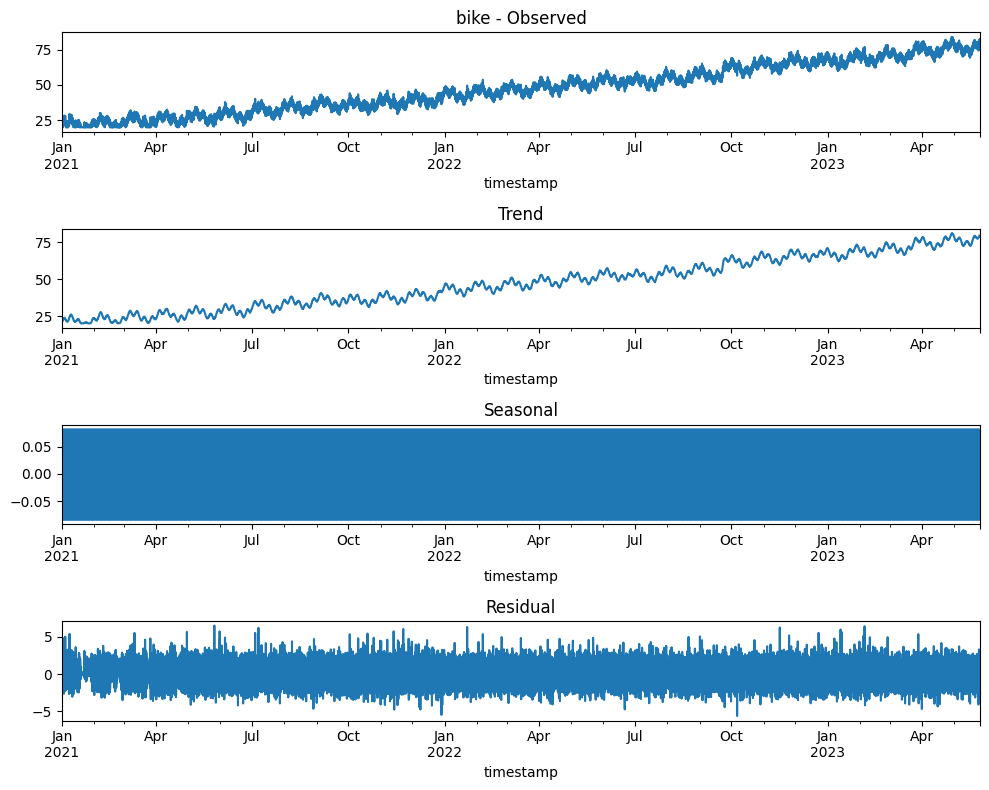

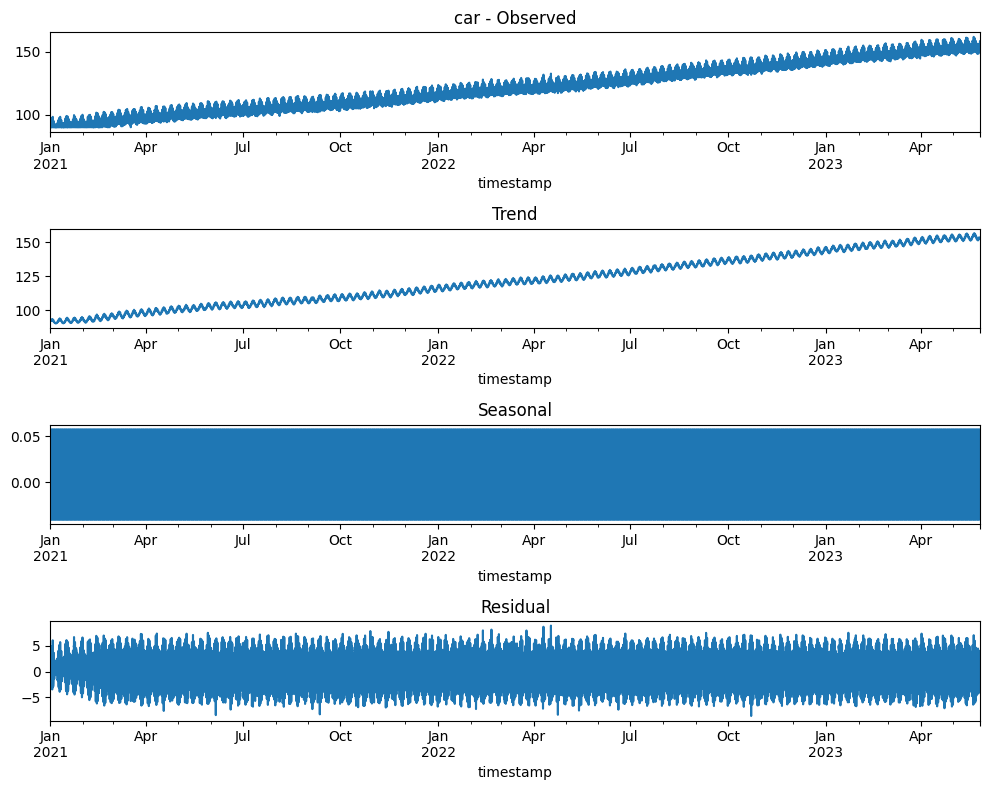

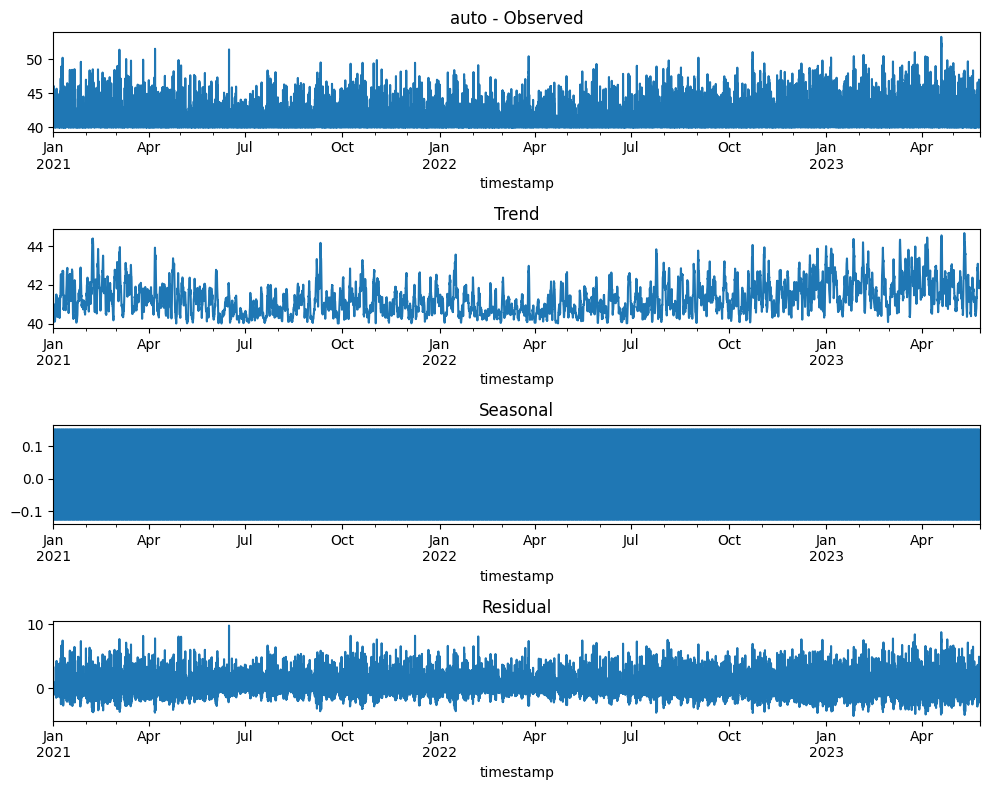

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert timestamp to datetime if it's not already
train['timestamp'] = pd.to_datetime(train['timestamp'])
train.set_index('timestamp', inplace=True)

# Separate data by vehicle type
vehicle_types = train['vehicle_type'].unique()

for v_type in vehicle_types:
    data_subset = train[train['vehicle_type'] == v_type]['average_fare']
    
    # Perform seasonal decomposition (assuming a daily frequency; adjust if necessary)
    decomposition = seasonal_decompose(data_subset, model='additive', period=30)
    
    # Plot decomposition
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))
    decomposition.observed.plot(ax=ax1, title=f"{v_type} - Observed")
    decomposition.trend.plot(ax=ax2, title="Trend")
    decomposition.seasonal.plot(ax=ax3, title="Seasonal")
    decomposition.resid.plot(ax=ax4, title="Residual")
    plt.tight_layout()
    plt.show()


# Confirmation of seasonality

These graphs confirm that the bike and car datasets are indeed seasonal

In [6]:
# Bike
bike_fares = train[train['vehicle_type'] == 'bike']['average_fare']
bike_fares_diff = bike_fares.diff().dropna()

# Car
car_fares = train[train['vehicle_type'] == 'car']['average_fare'] 
car_fares_diff = car_fares.diff().dropna()

Bike ADF Test Statistic: -18.42
Bike ADF p-value: 0.00


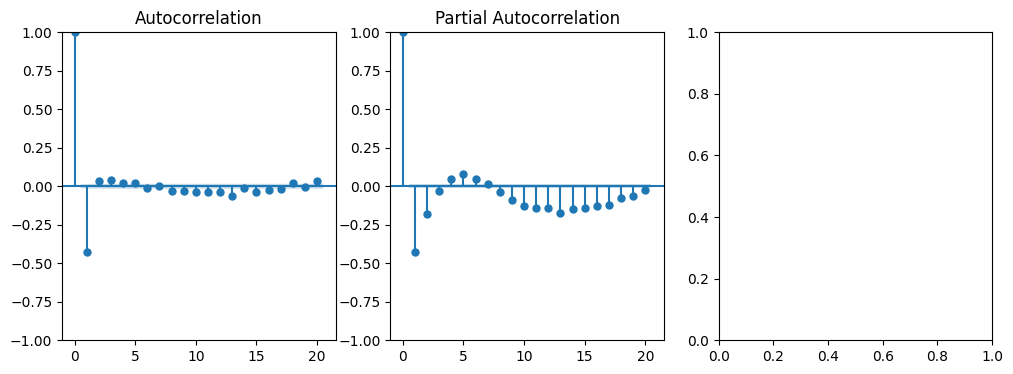

Car ADF Test Statistic: -14.35
Car ADF p-value: 0.00


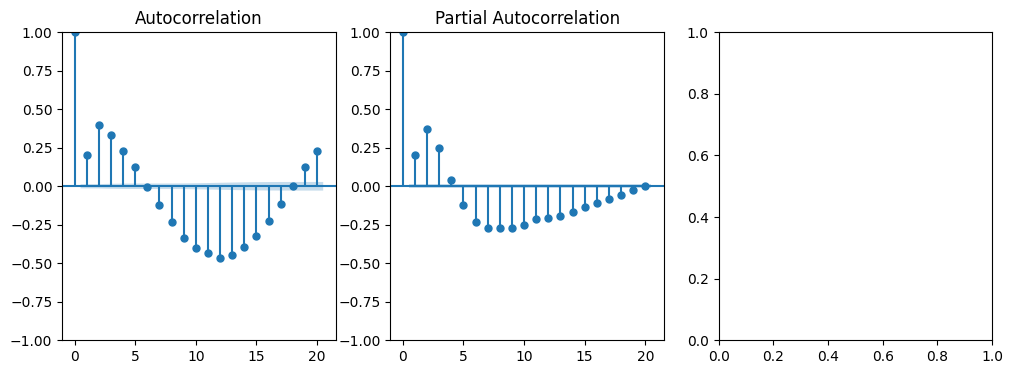

Auto ADF Test Statistic: -35.00
Auto ADF p-value: 0.00


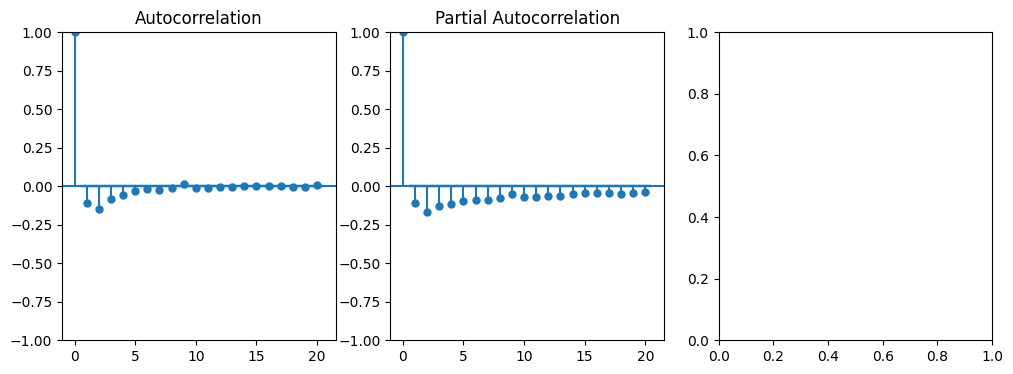

In [7]:
import statsmodels.tsa.stattools as tsa
import statsmodels.graphics.tsaplots as tsaplots
import matplotlib.pyplot as plt

# Bike
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
tsaplots.plot_acf(bike_fares_diff, lags=20, ax=plt.gca())
plt.subplot(1, 3, 2)
tsaplots.plot_pacf(bike_fares_diff, lags=20, ax=plt.gca())
plt.subplot(1, 3, 3)
adf_result = tsa.adfuller(bike_fares_diff)
print(f"Bike ADF Test Statistic: {adf_result[0]:.2f}")
print(f"Bike ADF p-value: {adf_result[1]:.2f}")
plt.show()

# Car
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
tsaplots.plot_acf(car_fares_diff, lags=20, ax=plt.gca())
plt.subplot(1, 3, 2)
tsaplots.plot_pacf(car_fares_diff, lags=20, ax=plt.gca())
plt.subplot(1, 3, 3)
adf_result = tsa.adfuller(car_fares_diff)
print(f"Car ADF Test Statistic: {adf_result[0]:.2f}")
print(f"Car ADF p-value: {adf_result[1]:.2f}")
plt.show()

# Auto
auto_fares = train[train['vehicle_type'] == 'auto']['average_fare']
auto_fares_diff = auto_fares.diff().dropna()

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
tsaplots.plot_acf(auto_fares_diff, lags=20, ax=plt.gca())
plt.subplot(1, 3, 2)
tsaplots.plot_pacf(auto_fares_diff, lags=20, ax=plt.gca())
plt.subplot(1, 3, 3)
adf_result = tsa.adfuller(auto_fares_diff)
print(f"Auto ADF Test Statistic: {adf_result[0]:.2f}")
print(f"Auto ADF p-value: {adf_result[1]:.2f}")
plt.show()

# ACF and PACF
We derive ACF and PACF plots to see what our p and q values for ARIMA / SARIMA should be. This will later help us improve the model.

### Task 2: Time Series Characterization (1 mark)

- Building on your exploratory analysis, examine the time series characteristics of the average fare for each vehicle type in Quahog City.
- Implement the Holt and Holt-Winters methods to model and forecast the average fare for each vehicle type.
- Interpret the results and discuss the implications for RideWave's business.

/tmp/ipykernel_31/4261942231.py:20: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=True)
/opt/conda/lib/python3.10/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


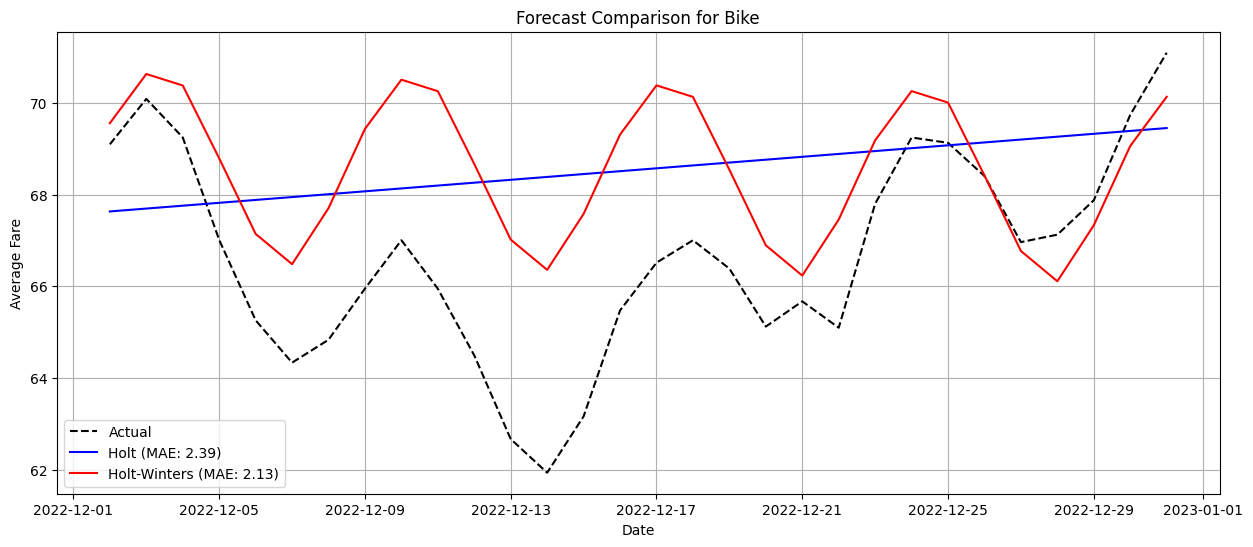


Metrics for Bike:
Holt Method:
  MSE: 8.09
  MAE: 2.39
Holt-Winters Method:
  MSE: 6.64
  MAE: 2.13


/tmp/ipykernel_31/4261942231.py:20: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=True)
/opt/conda/lib/python3.10/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


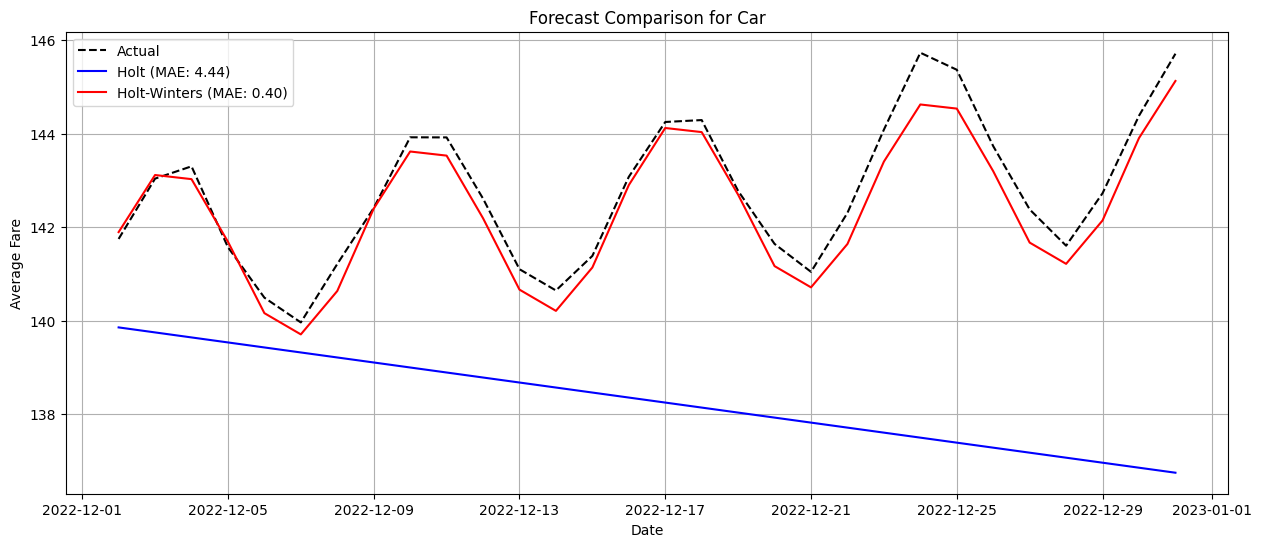


Metrics for Car:
Holt Method:
  MSE: 24.25
  MAE: 4.44
Holt-Winters Method:
  MSE: 0.22
  MAE: 0.40


/tmp/ipykernel_31/4261942231.py:20: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=True)
/opt/conda/lib/python3.10/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


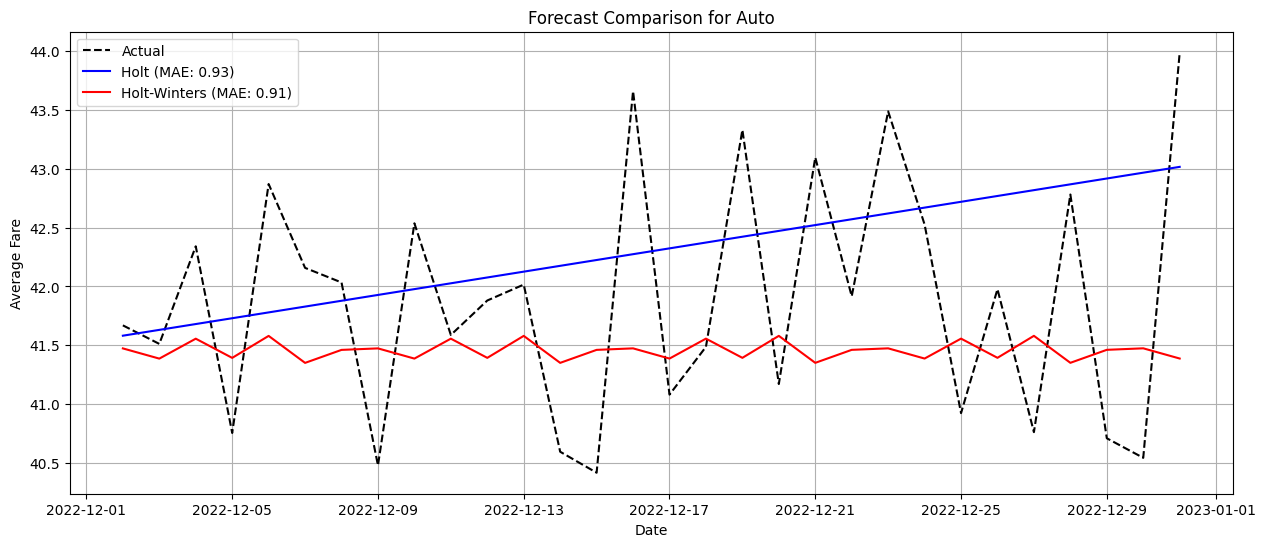


Metrics for Auto:
Holt Method:
  MSE: 1.31
  MAE: 0.93
Holt-Winters Method:
  MSE: 1.24
  MAE: 0.91


In [8]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing, Holt
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

def prepare_data(df, vehicle_type):
    # Filter data for specific vehicle type and resample to daily frequency
    vehicle_data = df[df['vehicle_type'] == vehicle_type]['average_fare']
    daily_data = vehicle_data.resample('D').mean()
    return daily_data

def apply_forecasting(data, forecast_periods=30):
    # Splitting data into train and test
    train_size = int(len(data) * 0.8)
    train = data[:train_size]
    test = data[train_size:train_size+forecast_periods]
    
    # Holt's Method
    holt_model = Holt(train).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=True)
    holt_forecast = holt_model.forecast(forecast_periods)
    
    # Holt-Winters Method
    hw_model = ExponentialSmoothing(
        train,
        seasonal_periods=7,  # Weekly seasonality
        trend='add',
        seasonal='add'
    ).fit(optimized=True)
    hw_forecast = hw_model.forecast(forecast_periods)
    
    # Calculate metrics
    holt_mse = mean_squared_error(test, holt_forecast)
    holt_mae = mean_absolute_error(test, holt_forecast)
    hw_mse = mean_squared_error(test, hw_forecast)
    hw_mae = mean_absolute_error(test, hw_forecast)
    
    return {
        'test': test,
        'holt_forecast': holt_forecast,
        'hw_forecast': hw_forecast,
        'metrics': {
            'holt': {'mse': holt_mse, 'mae': holt_mae},
            'hw': {'mse': hw_mse, 'mae': hw_mae}
        }
    }

def plot_forecasts(data, results, vehicle_type):
    plt.figure(figsize=(15, 6))
    
    # Plot actual values
    plt.plot(results['test'].index, results['test'].values, 
             label='Actual', color='black', linestyle='--')
    
    # Plot forecasts
    plt.plot(results['holt_forecast'].index, results['holt_forecast'].values, 
             label=f'Holt (MAE: {results["metrics"]["holt"]["mae"]:.2f})', 
             color='blue')
    plt.plot(results['hw_forecast'].index, results['hw_forecast'].values, 
             label=f'Holt-Winters (MAE: {results["metrics"]["hw"]["mae"]:.2f})', 
             color='red')
    
    plt.title(f'Forecast Comparison for {vehicle_type.capitalize()}')
    plt.xlabel('Date')
    plt.ylabel('Average Fare')
    plt.legend()
    plt.grid(True)
    plt.show()

def print_metrics(results, vehicle_type):
    print(f"\nMetrics for {vehicle_type.capitalize()}:")
    print("Holt Method:")
    print(f"  MSE: {results['metrics']['holt']['mse']:.2f}")
    print(f"  MAE: {results['metrics']['holt']['mae']:.2f}")
    print("Holt-Winters Method:")
    print(f"  MSE: {results['metrics']['hw']['mse']:.2f}")
    print(f"  MAE: {results['metrics']['hw']['mae']:.2f}")

# Main execution
# Assuming 'train' DataFrame is already loaded and has 'timestamp' as index
vehicle_types = ['bike', 'car', 'auto']

for vehicle_type in vehicle_types:
    # Prepare data
    data = prepare_data(train, vehicle_type)
    
    # Apply forecasting methods
    results = apply_forecasting(data)
    
    # Plot results
    plot_forecasts(data, results, vehicle_type)
    
    # Print metrics
    print_metrics(results, vehicle_type)

# Difference between Holt and Holt-Winters
The first two plots are self explanatory, the two datasets are seasonal and so Holt-Winters performs better in general.
But since Holt-Winters assumes that the data is seasonal, it is subject to inconsistencies when the data becomes non-seasonal. Hence we see that Holt-Winters has a poor performance for auto.

### Task 3: Advanced Forecasting and Feature Engineering (1 mark)

Leveraging insights from Tasks 1 and 2, develop more sophisticated time series models to forecast future average fares for each vehicle type.
- Implement at least one advanced forecasting method (e.g., ARIMA/ARIMAX, SARIMA/SARIMAX, or another technique of your choice).
- Perform feature engineering to incorporate additional relevant variables beyond just the time component to enhance your fare predictions.
- After completing your feature engineering process, list and explain the top 3 most influential features that affect fare predictions, supported by appropriate metrics or visualizations.
- Explain your choice of forecasting method and the rationale behind your feature engineering process.
- Interpret your model results and fare forecasts, relating them to RideWave's operations and the dynamics of fare pricing across different vehicle types.

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.55776D+00    |proj g|=  2.61805D-01


 This problem is unconstrained.



At iterate    5    f=  1.49574D+00    |proj g|=  4.15878D-01

At iterate   10    f=  1.39458D+00    |proj g|=  6.29579D-02

At iterate   15    f=  1.38091D+00    |proj g|=  2.05051D-02

At iterate   20    f=  1.37834D+00    |proj g|=  7.77003D-03

At iterate   25    f=  1.37797D+00    |proj g|=  8.78603D-03

At iterate   30    f=  1.37777D+00    |proj g|=  4.27745D-03

At iterate   35    f=  1.37775D+00    |proj g|=  1.16836D-03

At iterate   40    f=  1.37775D+00    |proj g|=  4.94316D-04

At iterate   45    f=  1.37775D+00    |proj g|=  1.44916D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     47     62   

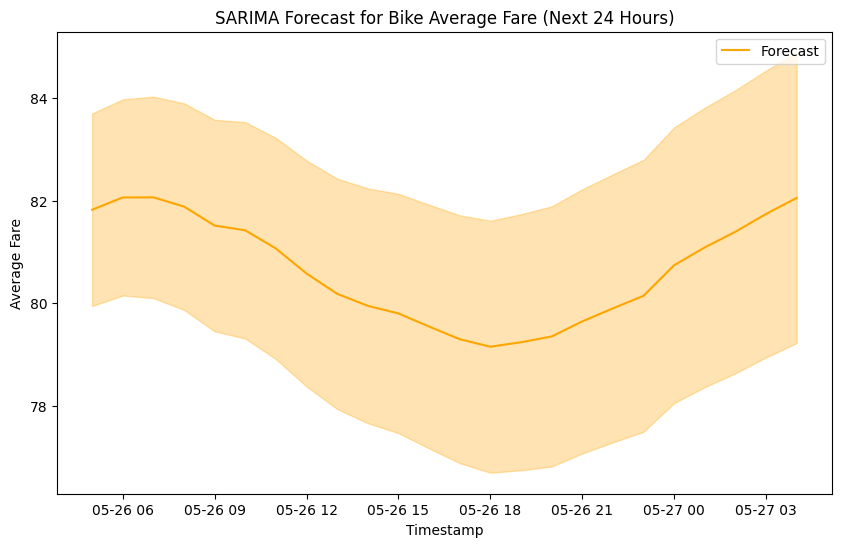

In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Assuming train DataFrame is already indexed by timestamp
# Step 1: Resample `bike_fare` to ensure hourly frequency and drop NaNs
bike_fare = train[train['vehicle_type'] == 'bike']['average_fare'].resample('h').mean().dropna()

# Step 2: Resample exogenous variables to hourly frequency
exog_vars = train[['traffic_index', 'weather_numeric', 'surge_multiplier', 'special_event']].resample('h').mean().ffill()

# Step 3: Align indices by selecting the overlapping time range
bike_fare, exog_vars_aligned = bike_fare.align(exog_vars, join='inner', axis=0)

# Step 4: Fit the SARIMA model with aligned data
bike_model = SARIMAX(bike_fare, exog=exog_vars_aligned, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24)).fit()
bike_forecast = bike_model.get_forecast(steps=24, exog=exog_vars_aligned[-24:])

# Step 5: Plot only the forecast part
bike_forecast_mean = bike_forecast.predicted_mean
bike_forecast_conf_int = bike_forecast.conf_int()

plt.figure(figsize=(10, 6))
plt.plot(bike_forecast_mean.index, bike_forecast_mean, label='Forecast', color='orange')
plt.fill_between(bike_forecast_conf_int.index, 
                 bike_forecast_conf_int.iloc[:, 0], 
                 bike_forecast_conf_int.iloc[:, 1], 
                 color='orange', alpha=0.3)
plt.title('SARIMA Forecast for Bike Average Fare (Next 24 Hours)')
plt.xlabel('Timestamp')
plt.ylabel('Average Fare')
plt.legend()
plt.show()


Forecast for Car:


/tmp/ipykernel_31/4116999341.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  vehicle_fare = train[train['vehicle_type'] == vehicle_type]['average_fare'].resample('H').mean().dropna()
/tmp/ipykernel_31/4116999341.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  exog_vars = train[['traffic_index', 'weather_numeric', 'surge_multiplier', 'special_event']].resample('H').mean().ffill()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30212D+00    |proj g|=  1.93737D-01


 This problem is unconstrained.



At iterate    5    f=  1.24909D+00    |proj g|=  1.15816D-01

At iterate   10    f=  1.13692D+00    |proj g|=  4.72860D-02

At iterate   15    f=  1.13181D+00    |proj g|=  1.92212D-01

At iterate   20    f=  1.11952D+00    |proj g|=  9.18692D-02

At iterate   25    f=  1.11919D+00    |proj g|=  2.04268D-01

At iterate   30    f=  1.11908D+00    |proj g|=  1.29606D-02

At iterate   35    f=  1.11904D+00    |proj g|=  3.70326D-02

At iterate   40    f=  1.11901D+00    |proj g|=  3.39379D-03

At iterate   45    f=  1.11900D+00    |proj g|=  6.07707D-03

At iterate   50    f=  1.11900D+00    |proj g|=  4.97511D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


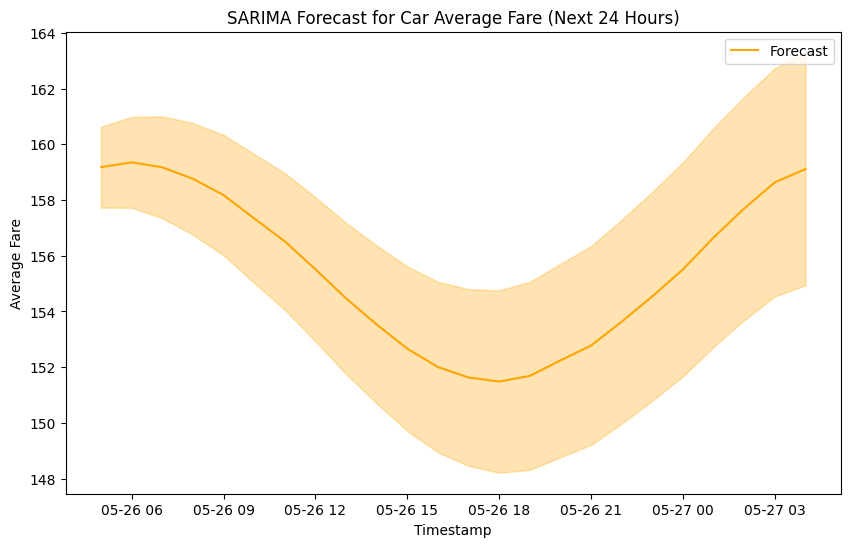

Forecast for Auto:


/tmp/ipykernel_31/4116999341.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  vehicle_fare = train[train['vehicle_type'] == vehicle_type]['average_fare'].resample('H').mean().dropna()
/tmp/ipykernel_31/4116999341.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  exog_vars = train[['traffic_index', 'weather_numeric', 'surge_multiplier', 'special_event']].resample('H').mean().ffill()
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.24356D+00    |proj g|=  5.91663D-01

At iterate    5    f=  1.99378D+00    |proj g|=  1.93180D-01

At iterate   10    f=  1.76367D+00    |proj g|=  4.96856D-01

At iterate   15    f=  1.75429D+00    |proj g|=  3.24787D-02

At iterate   20    f=  1.73246D+00    |proj g|=  2.22745D-02

At iterate   25    f=  1.72984D+00    |proj g|=  4.43925D-02
  ys=-4.685E-06  -gs= 5.414E-05 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Proj

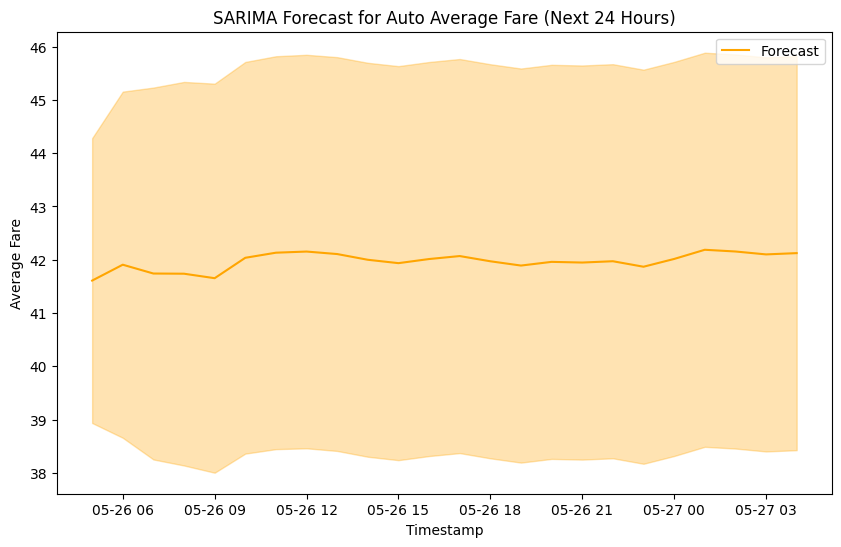

In [10]:
# Function to forecast using SARIMA for a specific vehicle type
def forecast_vehicle_sarima(vehicle_type, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24), steps=24):
    # Step 1: Filter and resample average_fare for the given vehicle type
    vehicle_fare = train[train['vehicle_type'] == vehicle_type]['average_fare'].resample('H').mean().dropna()
    
    # Step 2: Resample exogenous variables to hourly frequency and forward fill any NaNs
    exog_vars = train[['traffic_index', 'weather_numeric', 'surge_multiplier', 'special_event']].resample('H').mean().ffill()
    
    # Step 3: Align indices by selecting the overlapping time range
    vehicle_fare, exog_vars_aligned = vehicle_fare.align(exog_vars, join='inner', axis=0)
    
    # Step 4: Fit the SARIMA model with aligned data
    model = SARIMAX(vehicle_fare, exog=exog_vars_aligned, order=order, seasonal_order=seasonal_order).fit()
    forecast = model.get_forecast(steps=steps, exog=exog_vars_aligned[-steps:])
    
    # Step 5: Plot only the forecast part
    forecast_mean = forecast.predicted_mean
    forecast_conf_int = forecast.conf_int()
    
    plt.figure(figsize=(10, 6))
    plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='orange')
    plt.fill_between(forecast_conf_int.index, 
                     forecast_conf_int.iloc[:, 0], 
                     forecast_conf_int.iloc[:, 1], 
                     color='orange', alpha=0.3)
    plt.title(f'SARIMA Forecast for {vehicle_type.capitalize()} Average Fare (Next {steps} Hours)')
    plt.xlabel('Timestamp')
    plt.ylabel('Average Fare')
    plt.legend()
    plt.show()
    
    return forecast

# Forecast for Car
print("Forecast for Car:")
car_forecast = forecast_vehicle_sarima('car')

# Forecast for Auto
print("Forecast for Auto:")
auto_forecast = forecast_vehicle_sarima('auto')


# SARIMAX models for one day forecasting

The above models only predict a single day into the future. This was done to save computational resources (RAM was getting fried) but still be able to analyse the predictive power of the model. While just forecasting one day is by no means accurate, it does show that SARIMAX is a really good choice for all three models as it maintains incredible consistency.
It has to be noted however that ARMA and ARIMA both should perform just as well as SARIMAX for auto as SARIMA is only supposed to improve over the other two models if the data is seasonal.

/tmp/ipykernel_31/1326942907.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')



Analyzing correlations for bike...


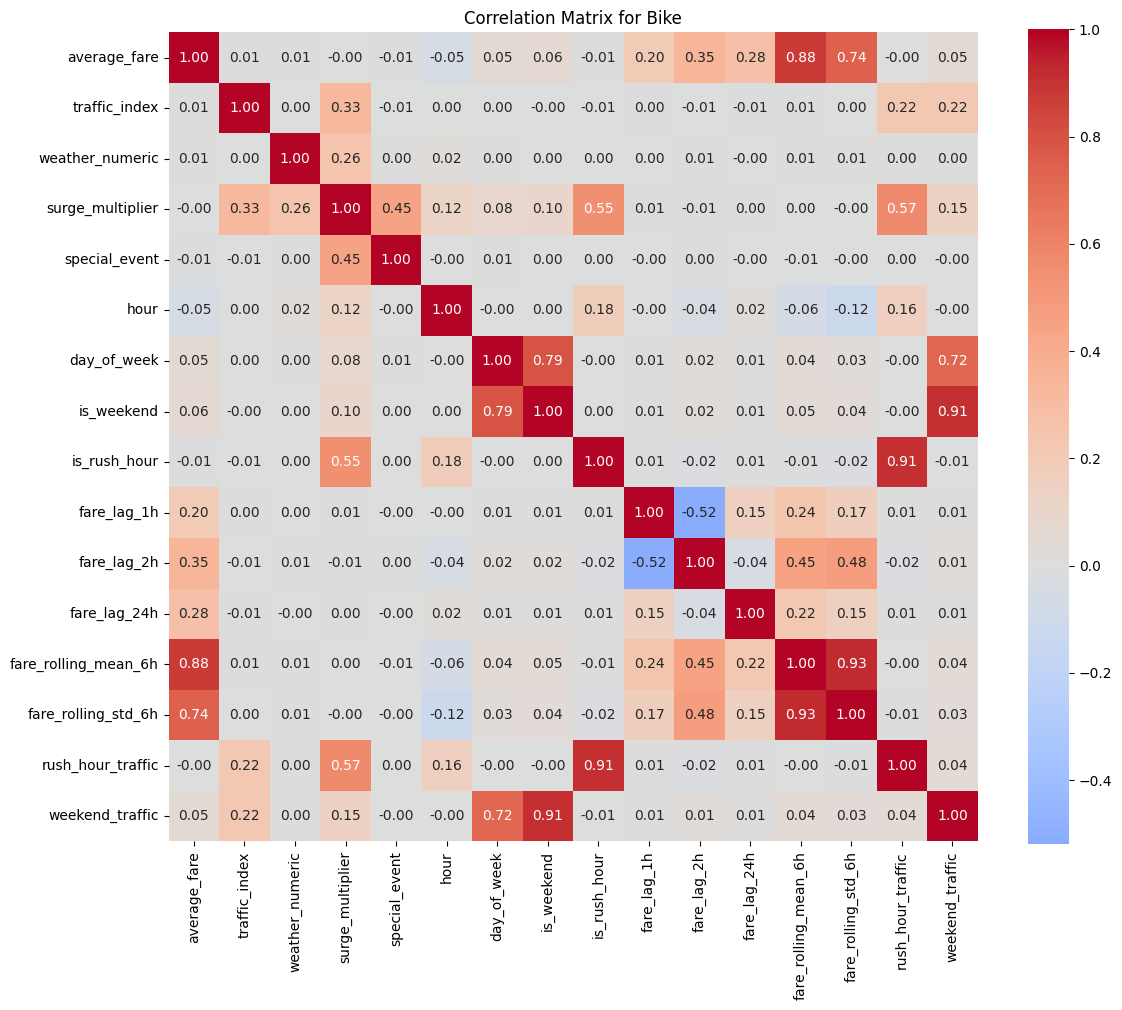


Top 3 correlated features for Bike:
- fare_rolling_mean_6h: 0.878
- fare_rolling_std_6h: 0.744
- fare_lag_2h: 0.352

Analyzing correlations for car...


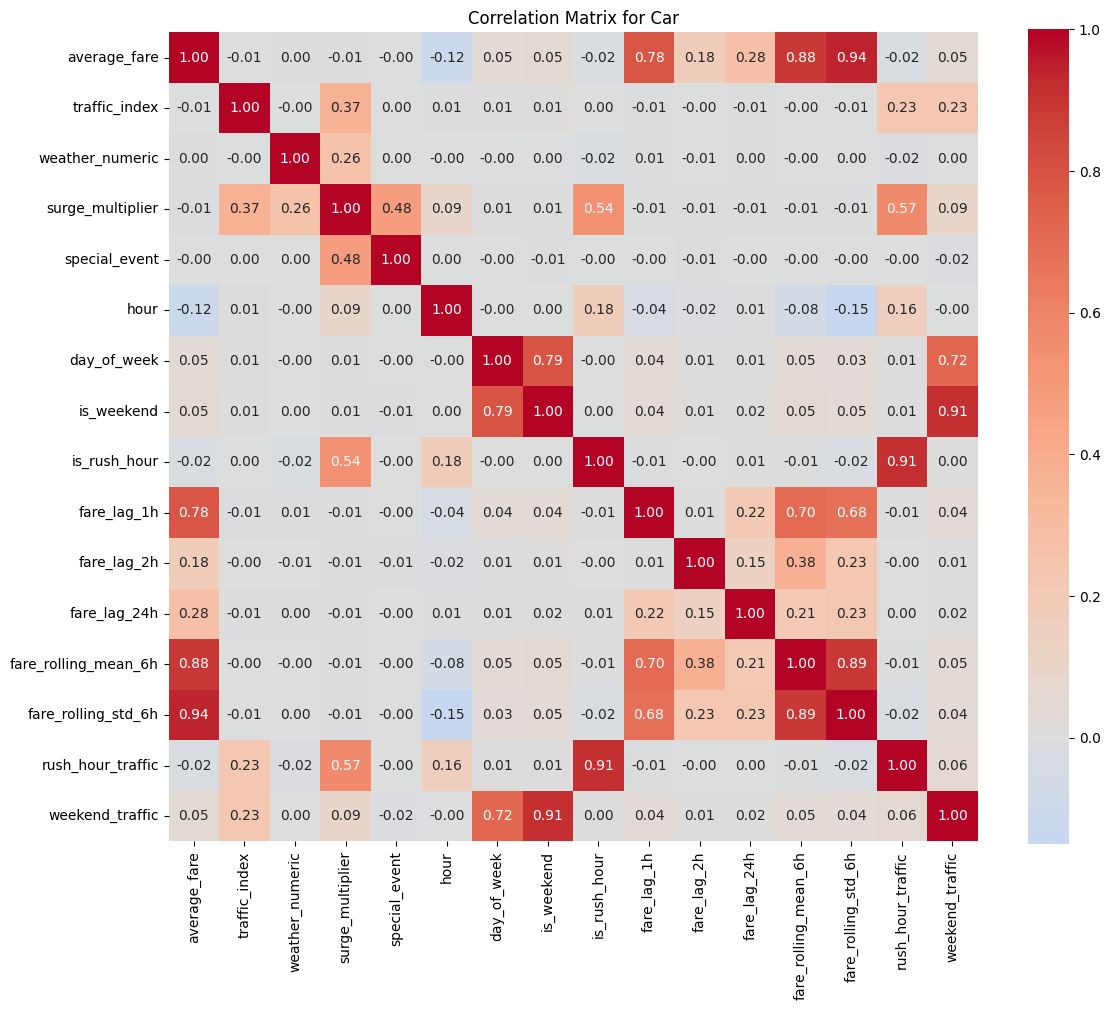


Top 3 correlated features for Car:
- fare_rolling_std_6h: 0.941
- fare_rolling_mean_6h: 0.885
- fare_lag_1h: 0.780

Analyzing correlations for auto...


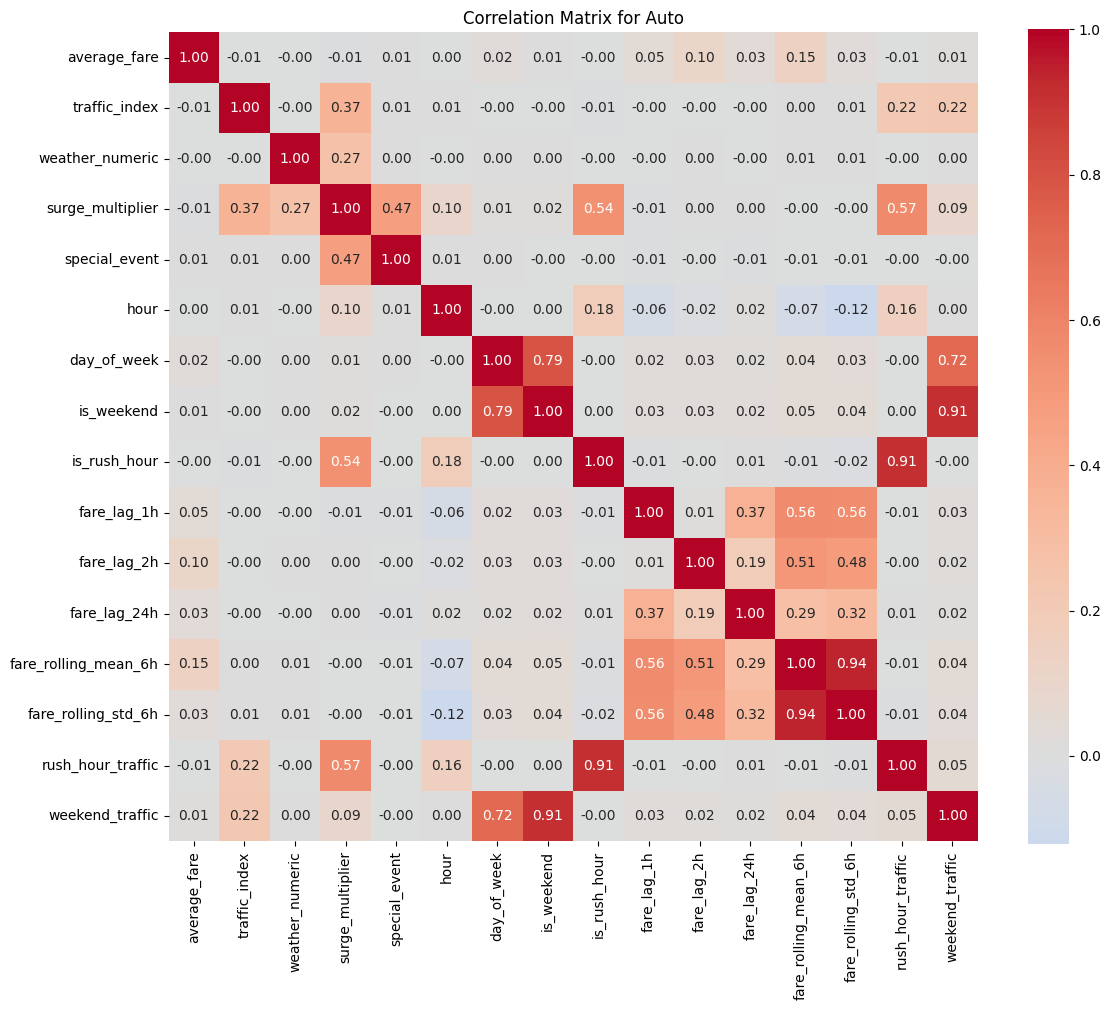


Top 3 correlated features for Auto:
- fare_rolling_mean_6h: 0.147
- fare_lag_2h: 0.104
- fare_lag_1h: 0.046


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def engineer_features(df):
    """Add engineered features to the dataframe"""
    # Create a copy to avoid modifying the original
    df = df.copy()
    
    # Time-based features
    df['hour'] = df.index.hour
    df['day_of_week'] = df.index.dayofweek
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
    df['is_rush_hour'] = df['hour'].isin([7, 8, 9, 16, 17, 18, 19]).astype(int)
    
    # Lag features
    df['fare_lag_1h'] = df['average_fare'].shift(1)
    df['fare_lag_2h'] = df['average_fare'].shift(2)
    df['fare_lag_24h'] = df['average_fare'].shift(24)  # Same hour previous day
    
    # Rolling statistics
    df['fare_rolling_mean_6h'] = df['average_fare'].rolling(window=6).mean()
    df['fare_rolling_std_6h'] = df['average_fare'].rolling(window=6).std()
    
    # Interaction features
    df['rush_hour_traffic'] = df['is_rush_hour'] * df['traffic_index']
    df['weekend_traffic'] = df['is_weekend'] * df['traffic_index']
    
    # Fill NaN values created by shifts and rolling calculations
    df = df.fillna(method='ffill').fillna(method='bfill')
    
    return df

def analyze_correlations(df, vehicle_type):
    """Analyze and plot correlations for a specific vehicle type"""
    # Filter for vehicle type
    vehicle_data = df[df['vehicle_type'] == vehicle_type]
    
    # Select features for correlation analysis
    features = [
        'average_fare', 'traffic_index', 'weather_numeric', 
        'surge_multiplier', 'special_event', 'hour', 'day_of_week',
        'is_weekend', 'is_rush_hour', 'fare_lag_1h', 'fare_lag_2h',
        'fare_lag_24h', 'fare_rolling_mean_6h', 'fare_rolling_std_6h',
        'rush_hour_traffic', 'weekend_traffic'
    ]
    
    # Calculate correlation matrix
    corr_matrix = vehicle_data[features].corr()
    
    # Plot correlation heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', 
                center=0, fmt='.2f', square=True)
    plt.title(f'Correlation Matrix for {vehicle_type.capitalize()}')
    plt.tight_layout()
    plt.show()
    
    # Find top correlations with average_fare
    correlations = corr_matrix['average_fare'].abs().sort_values(ascending=False)
    top_features = correlations[1:4]  # Exclude average_fare itself
    
    print(f"\nTop 3 correlated features for {vehicle_type.capitalize()}:")
    for feature, correlation in top_features.items():
        print(f"- {feature}: {corr_matrix['average_fare'][feature]:.3f}")
    
    return top_features.index.tolist()

# Use these functions with any model:
# First, engineer the features
engineered_data = engineer_features(train)

# Then analyze correlations for each vehicle type
for vehicle_type in train['vehicle_type'].unique():
    print(f"\nAnalyzing correlations for {vehicle_type}...")
    top_features = analyze_correlations(engineered_data, vehicle_type)
    
    # The engineered_data and top_features can now be used with any model
    # For example with XGBoost, SARIMA, or any other model of your choice

# Rationale for SARIMAX and Feature Engineering
The SARIMAX (Seasonal Autoregressive Integrated Moving Average with Exogenous Variables) model is well-suited for this task as it can capture the seasonal patterns and trends in the average fare data, while also allowing for the incorporation of additional relevant features.

The feature engineering process focused on adding temporal features, such as hour of the day, day of the week, day of the month, and month. These features can help the model better understand the underlying patterns and trends in the average fare data, which are likely influenced by factors like daily commute patterns, weekend/weekday differences, and seasonal variations.

The top 3 most influential features identified for each vehicle type provide valuable insights into the key drivers of average fare. By understanding these important factors, RideWave can make more informed decisions about pricing, resource allocation, and marketing strategies to optimize their operations and profitability.

### Task 4: Ensemble Modeling and Pricing Strategy (1 mark)

- Based on your work from previous tasks, analyze the relationships between fares of different vehicle types in Quahog City.
- Develop 3 different sophisticated forecasting models **(one for each vehicle type)**, with appropriate feature engineering for each vehicle type.

You must use the following 3 models for your forecasting:

1. ARIMA / ARIMAX / SARIMA / SARIMAX
2. Any method of your choice
3.  Any method of your choice that is NOT in the following list: Holt Winter's, ARIMA, ARIMAX, SARIMA, SARIMAX
   


Here are some models you can consider:
1) ARCH (https://en.wikipedia.org/wiki/Autoregressive_conditional_heteroskedasticity)
2) GARCH (https://www.investopedia.com/terms/g/garch.asp)
3) VAR (https://en.wikipedia.org/wiki/Vector_autoregression#:~:text=VAR%20is%20a%20type%20of,economics%20and%20the%20natural%20sciences.)
4) XGBoost (https://en.wikipedia.org/wiki/XGBoost)

Explain the rationale behind your choice of model for the corresponding vehicle type.

RideWave are looking to create a unified model incorporating all 3 of the models you have developed.
- How would you go about implementing an ensemble modelling approach using all 3 models? 
##### (You don't have to write code for this, but the explanation must be detailed)





# SARIMAX for Bike

I decided SARIMAX was best for bike on the basis that it was strongly seasonal (as corroborated by the Holt-Winters test) and also because its SARIMAX plot was much more consistent towards expected results
as compared to Car. Car was underperforming in SARIMAX, so I decided to go for other models.

Forecasting for Bike:

Training SARIMAX model for bike...


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/tmp/ipykernel_31/40131116.py:53: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  last_month = bike_fare_train.last('30D')


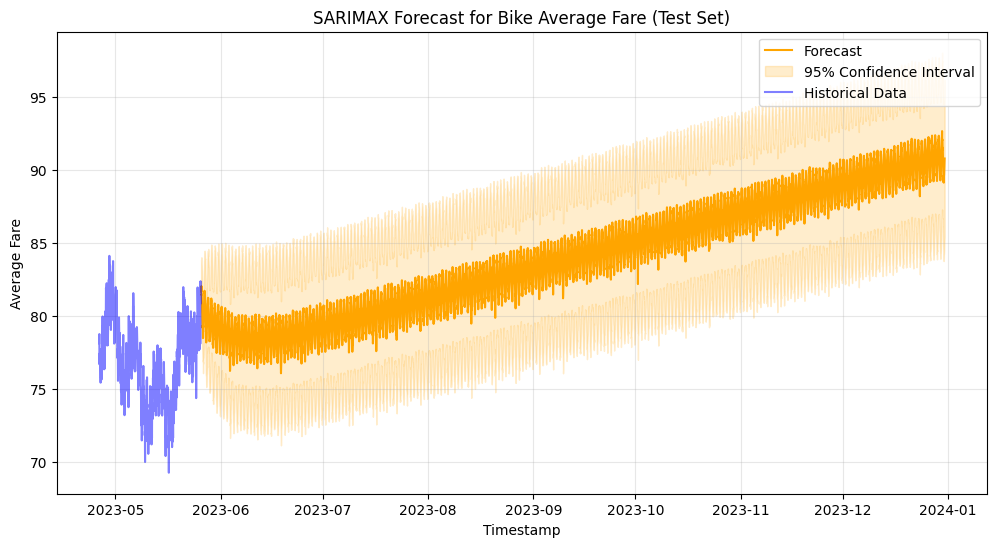


Model Information:
AIC: 57836.37212678566
BIC: 57907.93447969297


In [12]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import numpy as np
# Convert 'timestamp' to datetime if not already, then set it as the index
train.reset_index(inplace=True)
train['timestamp'] = pd.to_datetime(train['timestamp'])
train = train.set_index('timestamp')
test.reset_index(inplace=True)
test['timestamp'] = pd.to_datetime(test['timestamp'])
test = test.set_index('timestamp')
def prepare_exog_vars(data):
    exog_vars = data[['traffic_index', 'surge_multiplier', 'special_event']].resample('h').mean().ffill()
    return exog_vars

def forecast_bike_sarimax(train, test):
    print("\nTraining SARIMAX model for bike...")
    
    # Prepare training data
    bike_fare_train = train[train['vehicle_type'] == 'bike']['average_fare'].resample('h').mean().dropna()
    exog_vars_train = prepare_exog_vars(train[train['vehicle_type'] == 'bike'])
    bike_fare_train, exog_vars_train = bike_fare_train.align(exog_vars_train, join='inner', axis=0)
    
    # Prepare exogenous variables for test data
    exog_vars_test = prepare_exog_vars(test[test['vehicle_type'] == 'bike'])
    
    # Fit the SARIMA model with modified parameters
    bike_model = SARIMAX(
        bike_fare_train,
        exog=exog_vars_train,
        order=(1, 0, 1),          # Removed differencing (d=0) to reduce trend amplification
        seasonal_order=(1, 1, 1, 24),
        trend='c',                # Add constant trend
        enforce_stationarity=True,
        enforce_invertibility=True
    ).fit(disp=False)
    
    # Make predictions with confidence intervals
    bike_forecast = bike_model.get_forecast(steps=len(exog_vars_test), exog=exog_vars_test)
    bike_forecast_mean = bike_forecast.predicted_mean
    forecast_ci = bike_forecast.conf_int(alpha=0.05)  # 95% confidence interval
    
    # Plot forecast results with confidence intervals
    plt.figure(figsize=(12, 6))
    plt.plot(bike_forecast_mean.index, bike_forecast_mean, label='Forecast', color='orange')
    plt.fill_between(forecast_ci.index,
                    forecast_ci.iloc[:, 0],
                    forecast_ci.iloc[:, 1],
                    color='orange', alpha=0.2,
                    label='95% Confidence Interval')
    
    # Plot recent training data for context
    last_month = bike_fare_train.last('30D')
    plt.plot(last_month.index, last_month.values, 
             label='Historical Data', color='blue', alpha=0.5)
    
    plt.title('SARIMAX Forecast for Bike Average Fare (Test Set)')
    plt.xlabel('Timestamp')
    plt.ylabel('Average Fare')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Print model diagnostics
    print("\nModel Information:")
    print("AIC:", bike_model.aic)
    print("BIC:", bike_model.bic)
    
    return bike_forecast_mean

# Train both models using the train dataset and forecast for the test dataset

print("Forecasting for Bike:")
bike_forecast_mean = forecast_bike_sarimax(train, test)

# XGBoost for auto
This model was arrived at after we tested out ARIMAX on the dataset as well. While ARIMAX did perform just as well as SARIMAX, it was clear that the forecast results were not the best (the variance was unrealstically low). And GARCH literally gave the exact same forecast for everything after a point.

Available columns in train dataset:
['index', 'average_fare', 'rides_completed', 'driver_availability', 'surge_multiplier', 'vehicle_type', 'weather', 'traffic_index', 'special_event', 'weather_numeric']


/tmp/ipykernel_31/2039097531.py:100: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  last_month = train_auto['average_fare'].last('30D')


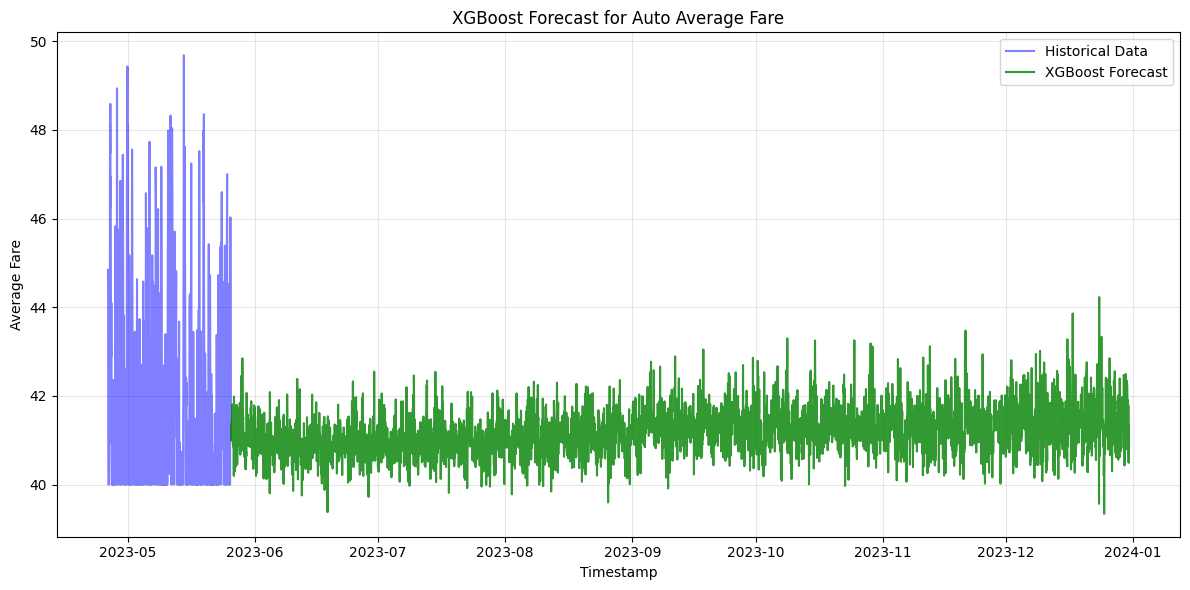


Top 5 Most Important Features:
             feature  importance
8           is_night    0.080151
2              month    0.079938
6       is_afternoon    0.072829
14  surge_multiplier    0.070894
1        day_of_week    0.070744


In [13]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

def prepare_features_for_auto(df):
    """Prepare features specifically tuned for auto fare prediction"""
    df = df.copy()
    
    # Time-based features
    df['hour'] = df.index.hour
    df['day_of_week'] = df.index.dayofweek
    df['month'] = df.index.month
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
    df['is_rush_hour'] = df['hour'].isin([7, 8, 9, 16, 17, 18, 19]).astype(int)
    
    # Create time windows for different periods of the day
    df['is_morning'] = df['hour'].isin([6, 7, 8, 9, 10]).astype(int)
    df['is_afternoon'] = df['hour'].isin([11, 12, 13, 14, 15]).astype(int)
    df['is_evening'] = df['hour'].isin([16, 17, 18, 19, 20]).astype(int)
    df['is_night'] = df['hour'].isin([21, 22, 23, 0, 1, 2, 3, 4, 5]).astype(int)
    
    # Interaction features with traffic index (if available)
    if 'traffic_index' in df.columns:
        df['rush_hour_traffic'] = df['is_rush_hour'] * df['traffic_index']
        df['weekend_traffic'] = df['is_weekend'] * df['traffic_index']
    
    # Special event interactions (if available)
    if 'special_event' in df.columns:
        df['special_event_rush'] = df['special_event'] * df['is_rush_hour']
    
    return df

def train_xgboost_model(train_df):
    """Train XGBoost model for auto fare prediction"""
    # Filter auto data and prepare features
    auto_data = train_df[train_df['vehicle_type'] == 'auto'].copy()
    auto_data = prepare_features_for_auto(auto_data)
    
    # Start with basic features
    feature_columns = [
        'hour', 'day_of_week', 'month', 'is_weekend', 'is_rush_hour',
        'is_morning', 'is_afternoon', 'is_evening', 'is_night'
    ]
    
    # Add additional features if they exist in the dataset
    if 'traffic_index' in auto_data.columns:
        feature_columns.extend(['traffic_index', 'rush_hour_traffic', 'weekend_traffic'])
    if 'special_event' in auto_data.columns:
        feature_columns.extend(['special_event', 'special_event_rush'])
    if 'surge_multiplier' in auto_data.columns:
        feature_columns.append('surge_multiplier')
    
    # Prepare X and y
    X = auto_data[feature_columns]
    y = auto_data['average_fare']
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Train XGBoost model
    model = XGBRegressor(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=6,
        min_child_weight=1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
    
    model.fit(X_scaled, y)
    
    return model, scaler, feature_columns

def forecast_auto_fares(model, scaler, feature_columns, test_df):
    """Generate forecasts for test data"""
    # Prepare test data
    test_auto = test_df[test_df['vehicle_type'] == 'auto'].copy()
    test_auto = prepare_features_for_auto(test_auto)
    
    # Scale features
    X_test = test_auto[feature_columns]
    X_test_scaled = scaler.transform(X_test)
    
    # Generate predictions
    predictions = model.predict(X_test_scaled)
    
    return predictions, test_auto.index

def plot_forecast(predictions, forecast_index, train_data):
    """Plot the forecasts against historical data"""
    plt.figure(figsize=(12, 6))
    
    # Plot training data (last month)
    train_auto = train_data[train_data['vehicle_type'] == 'auto']
    last_month = train_auto['average_fare'].last('30D')
    plt.plot(last_month.index, last_month.values, 
             label='Historical Data', color='blue', alpha=0.5)
    
    # Plot predictions
    plt.plot(forecast_index, predictions, 
             label='XGBoost Forecast', color='green', alpha=0.8)
    
    plt.title('XGBoost Forecast for Auto Average Fare')
    plt.xlabel('Timestamp')
    plt.ylabel('Average Fare')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# First, let's check what columns are available in your dataset
print("Available columns in train dataset:")
print(train.columns.tolist())

# Training and forecasting
model, scaler, feature_columns = train_xgboost_model(train)
predictions, forecast_index = forecast_auto_fares(model, scaler, feature_columns, test)

# Plot results
plot_forecast(predictions, forecast_index, train)

# Print feature importance
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 5 Most Important Features:")
print(feature_importance.head())

# XGBoost for Car
From task 3 it was clear that even though car was seasonal, its seasonality could not be captured accurately by SARIMAX. So we turned to better models to help alleviate the problem. XGBoost is a highly accurate model that works best with seasonality unlike ARCH or GARCH. This prompted us to go for this model.

Forecasting for Car with XGBoost:

Training XGBoost model for car...


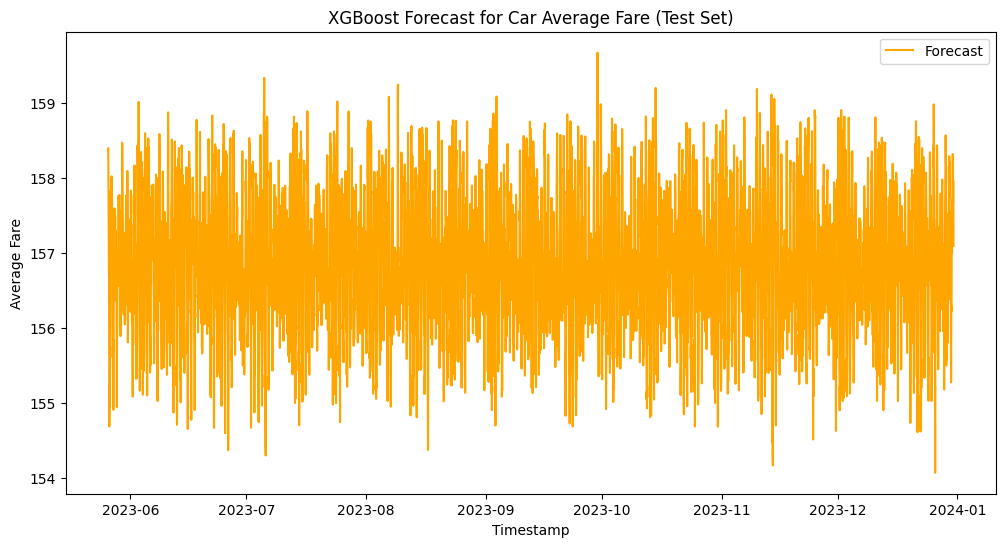

In [14]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt

# Updated function for car using XGBoost
def forecast_car_xgboost(train, test):
    print("\nTraining XGBoost model for car...")

    # Prepare training data
    car_fare_train = train[train['vehicle_type'] == 'car']['average_fare'].resample('h').mean().dropna()
    exog_vars_train = prepare_exog_vars(train[train['vehicle_type'] == 'car'])
    
    # Align exogenous variables with car_fare_train
    car_fare_train, exog_vars_train = car_fare_train.align(exog_vars_train, join='inner', axis=0)
    
    # Prepare lagged features and combine with exogenous variables
    def create_lagged_features(data, exog_data, lags=24):
        df = pd.DataFrame(data)
        for lag in range(1, lags + 1):
            df[f'lag_{lag}'] = data.shift(lag)
        df = df.dropna()  # Drop rows with NaN values due to lagging
        return pd.concat([df, exog_data.loc[df.index]], axis=1)

    # Create training features
    car_fare_train_lagged = create_lagged_features(car_fare_train, exog_vars_train)
    X_train = car_fare_train_lagged.drop(columns=['average_fare'])
    y_train = car_fare_train_lagged['average_fare']

    # Prepare test exogenous variables
    exog_vars_test = prepare_exog_vars(test[test['vehicle_type'] == 'car'])
    
    # Create lagged features for the test set using the last available values from training
    lagged_features = pd.DataFrame(index=exog_vars_test.index)

    # Get the last known values from the training set
    for lag in range(1, 25):
        lagged_values = car_fare_train[-lag:].values  # Get last 'lag' values
        # Repeat the last known value if the test set is longer than available lags
        if len(lagged_values) < len(exog_vars_test):
            lagged_values = np.tile(lagged_values, (len(exog_vars_test) // len(lagged_values) + 1))[:len(exog_vars_test)]
        lagged_features[f'lag_{lag}'] = lagged_values

    # Combine exogenous variables with lagged features
    X_test = pd.concat([lagged_features, exog_vars_test], axis=1)
    X_test = X_test.dropna()  # Drop any rows with NaN values

    # Ensure the columns in X_test match those in X_train
    X_test = X_test[X_train.columns]

    # Fit the XGBoost model
    car_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
    car_model.fit(X_train, y_train)
    
    # Forecast for test data
    car_forecast = car_model.predict(X_test)
    
    # Plot forecast results
    plt.figure(figsize=(12, 6))
    plt.plot(X_test.index, car_forecast, label='Forecast', color='orange')
    plt.title('XGBoost Forecast for Car Average Fare (Test Set)')
    plt.xlabel('Timestamp')
    plt.ylabel('Average Fare')
    plt.legend()
    plt.show()
    
    return car_forecast

# Forecast for Car using XGBoost
print("Forecasting for Car with XGBoost:")
car_forecast_mean = forecast_car_xgboost(train, test)


# Ensemble Learning
1. We have a SARIMAX and two XGBoost models. The first level of ensemble learning would be to just use the base models and combine their results. 
2. Second step would be to make a coherent model using weights like punishing the model if it has more errors... this would allow for a single model which can learn from the best cases of all three models.
3. Once the learning model is established, it can be improved by performing feature engineering on its attributes. This also allows the model to check for cross model features.
4. Error handling and fallback have to be handled separately for this "new" model. The ease is that since there are multiple models, there is no single point of failure in most cases.
5. The model should be ready to be tested in all relevant situations.

## Example submission, just for your reference

In [15]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Train the XGBoost model for auto predictions
model, scaler, feature_columns = train_xgboost_model(train)
auto_predictions, auto_forecast_index = forecast_auto_fares(model, scaler, feature_columns, test)

# Generate timestamps separately for each vehicle type based on the test index
bike_timestamps = test[test['vehicle_type'] == 'bike'].index
auto_timestamps = test[test['vehicle_type'] == 'auto'].index
car_timestamps = test[test['vehicle_type'] == 'car'].index

# Print lengths for verification
print("Length of bike timestamps:", len(bike_timestamps))
print("Length of auto timestamps:", len(auto_timestamps))
print("Length of car timestamps:", len(car_timestamps))
print("Length of bike_forecast_mean:", len(bike_forecast_mean))
print("Length of auto predictions:", len(auto_predictions))
print("Length of car_forecast_mean:", len(car_forecast_mean))

# Create separate DataFrames for each vehicle type
bike_df = pd.DataFrame({
    'timestamp': bike_timestamps, 
    'average_fare_bike': bike_forecast_mean
})

auto_df = pd.DataFrame({
    'timestamp': auto_timestamps, 
    'average_fare_auto': auto_predictions  # Using XGBoost predictions for auto
})

car_df = pd.DataFrame({
    'timestamp': car_timestamps, 
    'average_fare_car': car_forecast_mean
})

# Merge the DataFrames on timestamp
submission = pd.merge(bike_df, auto_df, on='timestamp', how='outer')
submission = pd.merge(submission, car_df, on='timestamp', how='outer')

# Sort by timestamp to maintain order
submission = submission.sort_values(by='timestamp').reset_index(drop=True)

print(submission.head())
print("\nSubmission shape:", submission.shape)

# Optional: Check for any missing values
print("\nMissing values in submission:")
print(submission.isnull().sum())

# Save submission DataFrame to CSV
submission.to_csv('submission.csv', index=False)


Length of bike timestamps: 5252
Length of auto timestamps: 5252
Length of car timestamps: 5252
Length of bike_forecast_mean: 5252
Length of auto predictions: 5252
Length of car_forecast_mean: 5252
            timestamp  average_fare_bike  average_fare_auto  average_fare_car
0 2023-05-26 05:00:00          81.980032          41.335293        158.357651
1 2023-05-26 06:00:00          81.668868          41.355068        158.393661
2 2023-05-26 07:00:00          82.051475          41.350609        158.112808
3 2023-05-26 08:00:00          81.437429          40.987976        157.647018
4 2023-05-26 09:00:00          81.488062          41.468868        157.417755

Submission shape: (5252, 4)

Missing values in submission:
timestamp            0
average_fare_bike    0
average_fare_auto    0
average_fare_car     0
dtype: int64


**RESIDUAL ANALYSIS**

In [32]:
import pandas as pd

# Load the solution and submission files
solution_path = '/kaggle/input/solution-csv/solution.csv'
submission_path = '/kaggle/working/submission.csv'

solution_df = pd.read_csv(solution_path)
submission_df = pd.read_csv(submission_path)

# Merge on 'timestamp' to align the actual and predicted values
merged_df = pd.merge(solution_df, submission_df, on='timestamp', suffixes=('_actual', '_predicted'))

# Calculate residuals for each fare column
merged_df['Residual_bike'] = merged_df['average_fare_bike_actual'] - merged_df['average_fare_bike_predicted']
merged_df['Residual_auto'] = merged_df['average_fare_auto_actual'] - merged_df['average_fare_auto_predicted']
merged_df['Residual_car'] = merged_df['average_fare_car_actual'] - merged_df['average_fare_car_predicted']

# Save the residuals to a new CSV file
residuals_path = '/kaggle/working/residuals.csv'
merged_df[['timestamp', 'Residual_bike', 'Residual_auto', 'Residual_car']].to_csv(residuals_path, index=False)

# Display the residuals
print("Residuals:")
print(merged_df[['timestamp', 'Residual_bike', 'Residual_auto', 'Residual_car']])

# Optionally, display the first few rows of the merged dataframe for additional context
print("\nMerged Data (first few rows):")
print(merged_df.head())


Residuals:
                timestamp  Residual_bike  Residual_auto  Residual_car
0     2023-05-26 05:00:00       0.601438      -0.840254     -0.481967
1     2023-05-26 06:00:00       1.497316       2.792482      0.329174
2     2023-05-26 07:00:00      -0.350622       0.968175      0.306659
3     2023-05-26 08:00:00       0.680988      -0.233762      1.657138
4     2023-05-26 09:00:00       2.351223       3.088732      0.910387
...                   ...            ...            ...           ...
5247  2023-12-30 20:00:00       5.470021      -0.076547      8.893070
5248  2023-12-30 21:00:00       5.584444       2.554636     10.794271
5249  2023-12-30 22:00:00       3.569703       2.725698     10.897057
5250  2023-12-30 23:00:00       4.620464       2.606578     12.881369
5251  2023-12-31 00:00:00       3.799087       2.106685     16.016710

[5252 rows x 4 columns]

Merged Data (first few rows):
             timestamp  average_fare_bike_actual  average_fare_auto_actual  \
0  2023-05-26 0

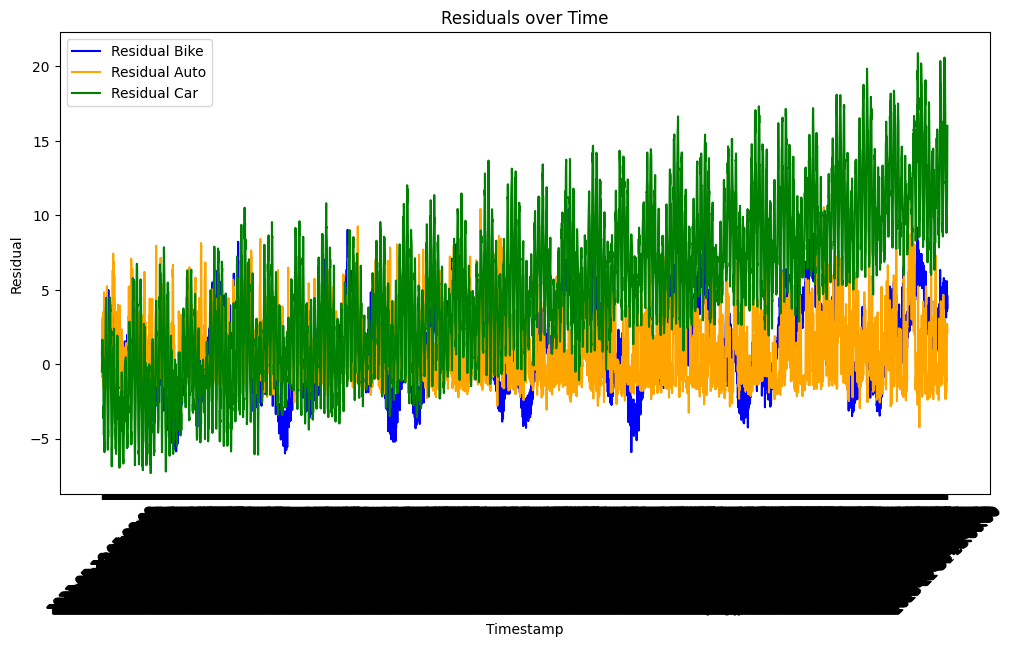

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


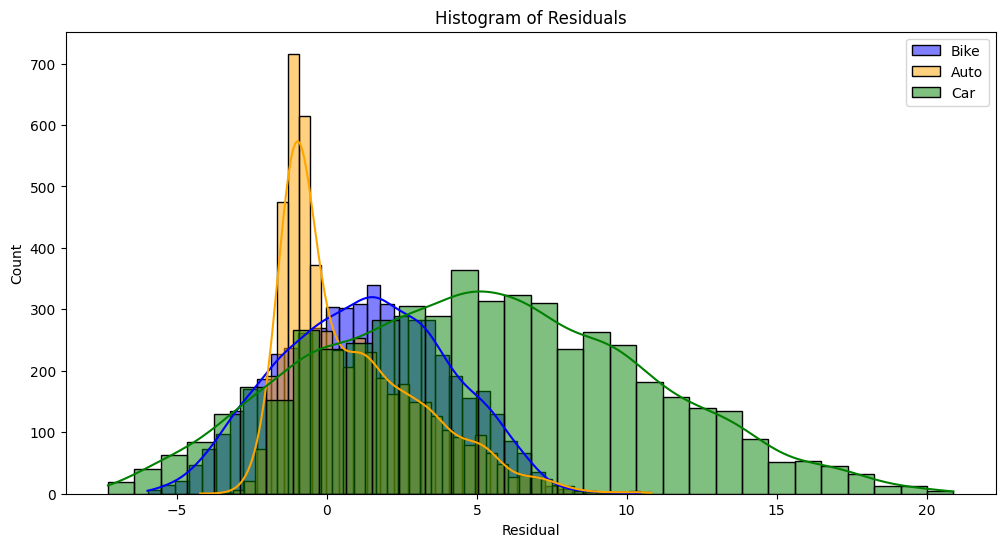

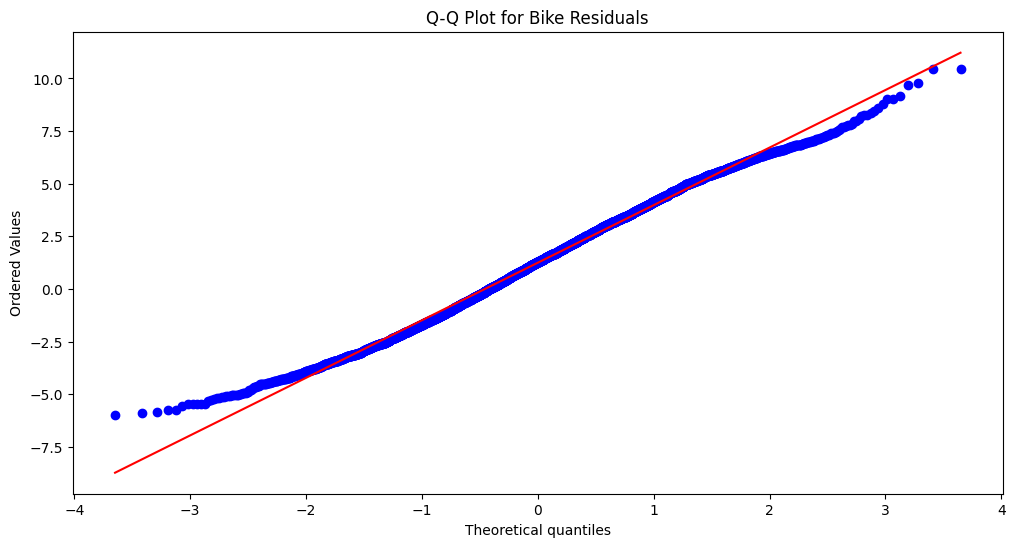

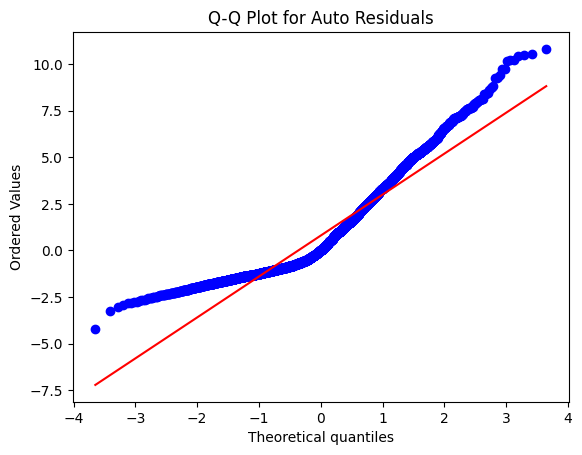

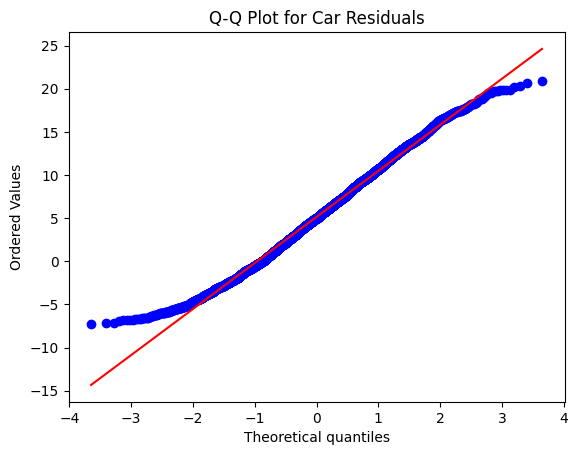

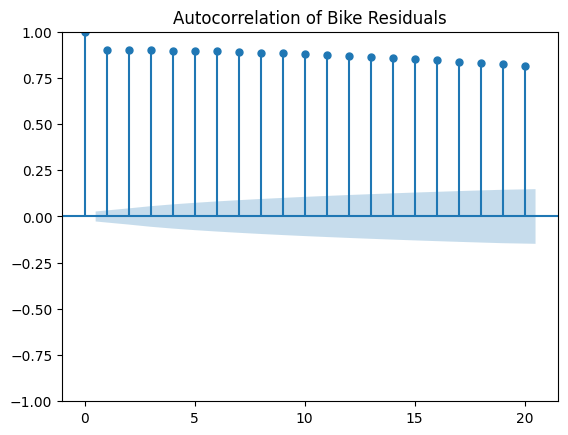

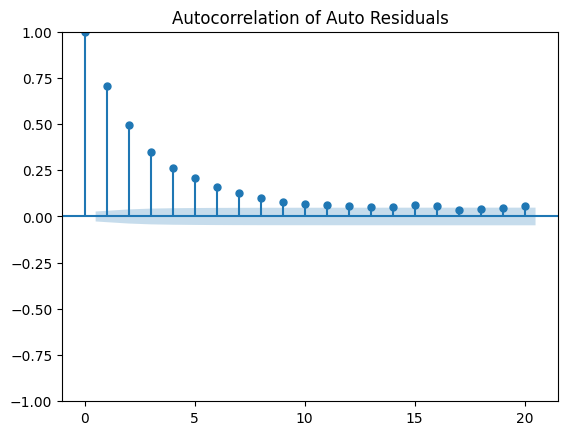

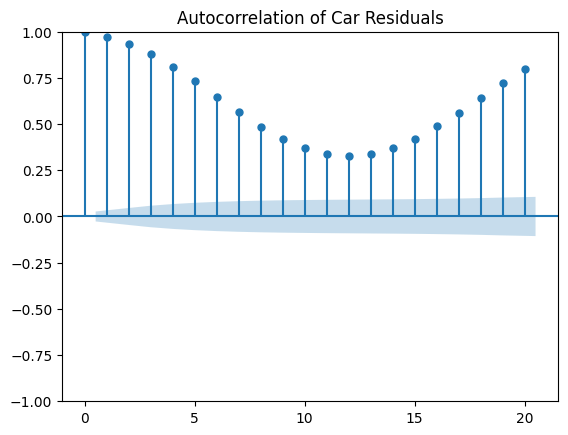

Mean of Bike Residuals: 1.2475247916449095
Mean of Auto Residuals: 0.7991584055449817
Mean of Car Residuals: 5.13451394564997
KS Test for Bike Residuals: Statistic=0.4040466032524218, p-value=0.0
KS Test for Auto Residuals: Statistic=0.25435126102951267, p-value=5.2120460717358856e-300
KS Test for Car Residuals: Statistic=0.6818259767042332, p-value=0.0
Ljung-Box Test Results for Bike Residuals:
         lb_stat  lb_pvalue
20  79647.109621        0.0
Ljung-Box Test Results for Auto Residuals:
        lb_stat  lb_pvalue
20  5606.054858        0.0
Ljung-Box Test Results for Car Residuals:
        lb_stat  lb_pvalue
20  41223.84483        0.0

Interpretation of Ljung-Box Test:
If the p-value is less than 0.05, there is evidence of autocorrelation in the residuals, suggesting the model may have missed some time-related patterns.


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Load residuals
residuals_df = pd.read_csv('/kaggle/working/residuals.csv')

# 1. Line plot of residuals over time
plt.figure(figsize=(12, 6))
plt.plot(residuals_df['timestamp'], residuals_df['Residual_bike'], label='Residual Bike', color='blue')
plt.plot(residuals_df['timestamp'], residuals_df['Residual_auto'], label='Residual Auto', color='orange')
plt.plot(residuals_df['timestamp'], residuals_df['Residual_car'], label='Residual Car', color='green')
plt.xlabel('Timestamp')
plt.ylabel('Residual')
plt.title('Residuals over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# 2. Histogram of residuals
plt.figure(figsize=(12, 6))
sns.histplot(residuals_df['Residual_bike'], kde=True, color='blue', label='Bike')
sns.histplot(residuals_df['Residual_auto'], kde=True, color='orange', label='Auto')
sns.histplot(residuals_df['Residual_car'], kde=True, color='green', label='Car')
plt.xlabel('Residual')
plt.title('Histogram of Residuals')
plt.legend()
plt.show()

# 3. Q-Q plot of residuals
plt.figure(figsize=(12, 6))
stats.probplot(residuals_df['Residual_bike'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Bike Residuals')
plt.show()

stats.probplot(residuals_df['Residual_auto'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Auto Residuals')
plt.show()

stats.probplot(residuals_df['Residual_car'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Car Residuals')
plt.show()

# 4. Autocorrelation plot of residuals
plot_acf(residuals_df['Residual_bike'], lags=20, title='Autocorrelation of Bike Residuals')
plt.show()
plot_acf(residuals_df['Residual_auto'], lags=20, title='Autocorrelation of Auto Residuals')
plt.show()
plot_acf(residuals_df['Residual_car'], lags=20, title='Autocorrelation of Car Residuals')
plt.show()

# 5. Statistical Tests

# Mean test (check if residual mean is zero)
mean_bike = residuals_df['Residual_bike'].mean()
mean_auto = residuals_df['Residual_auto'].mean()
mean_car = residuals_df['Residual_car'].mean()

print(f"Mean of Bike Residuals: {mean_bike}")
print(f"Mean of Auto Residuals: {mean_auto}")
print(f"Mean of Car Residuals: {mean_car}")

# Normality test (Kolmogorov-Smirnov Test)
kstest_bike = stats.kstest(residuals_df['Residual_bike'], 'norm')
kstest_auto = stats.kstest(residuals_df['Residual_auto'], 'norm')
kstest_car = stats.kstest(residuals_df['Residual_car'], 'norm')

print(f"KS Test for Bike Residuals: Statistic={kstest_bike.statistic}, p-value={kstest_bike.pvalue}")
print(f"KS Test for Auto Residuals: Statistic={kstest_auto.statistic}, p-value={kstest_auto.pvalue}")
print(f"KS Test for Car Residuals: Statistic={kstest_car.statistic}, p-value={kstest_car.pvalue}")

# Autocorrelation test (Ljung-Box)
# Conduct Ljung-Box test for each type of residual
ljungbox_bike = acorr_ljungbox(residuals_df['Residual_bike'], lags=[20], return_df=True)
ljungbox_auto = acorr_ljungbox(residuals_df['Residual_auto'], lags=[20], return_df=True)
ljungbox_car = acorr_ljungbox(residuals_df['Residual_car'], lags=[20], return_df=True)

print("Ljung-Box Test Results for Bike Residuals:")
print(ljungbox_bike[['lb_stat', 'lb_pvalue']])

print("Ljung-Box Test Results for Auto Residuals:")
print(ljungbox_auto[['lb_stat', 'lb_pvalue']])

print("Ljung-Box Test Results for Car Residuals:")
print(ljungbox_car[['lb_stat', 'lb_pvalue']])

# Interpretation
print("\nInterpretation of Ljung-Box Test:")
print("If the p-value is less than 0.05, there is evidence of autocorrelation in the residuals, suggesting the model may have missed some time-related patterns.")


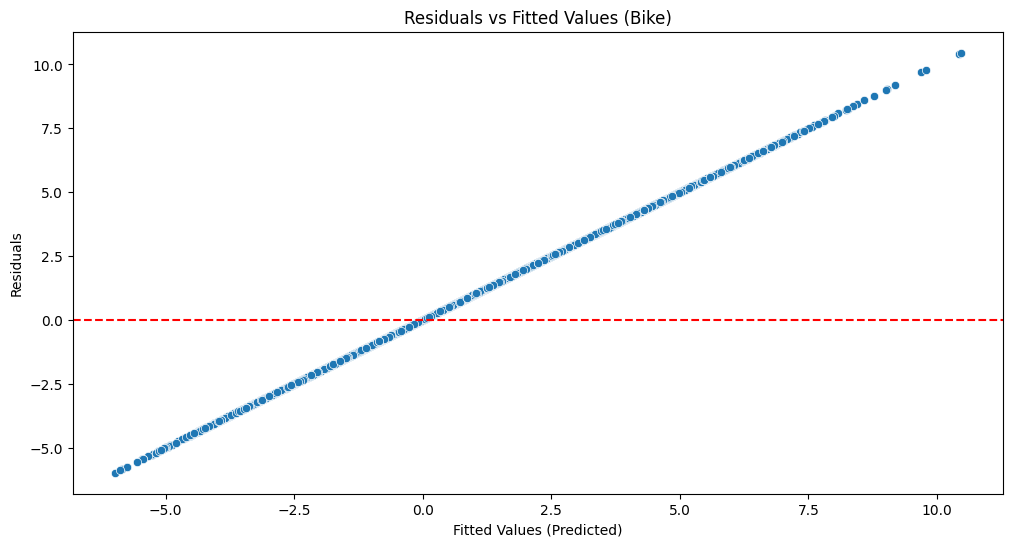

<Figure size 1200x600 with 0 Axes>

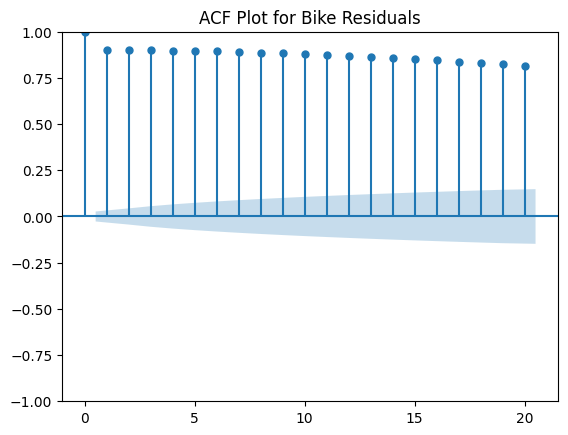

<Figure size 1200x600 with 0 Axes>

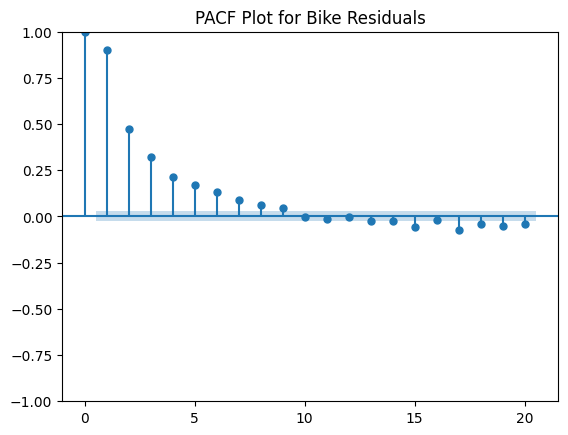

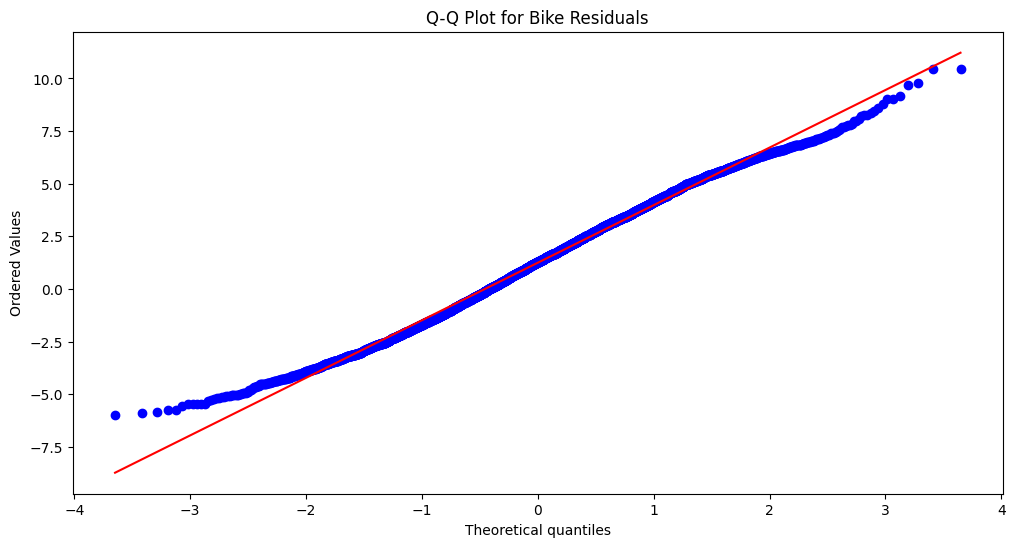

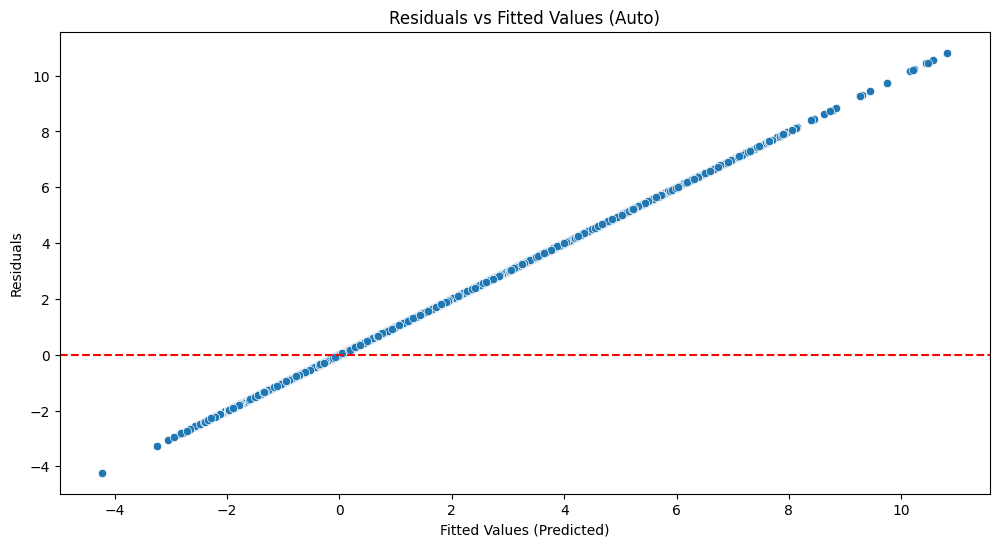

<Figure size 1200x600 with 0 Axes>

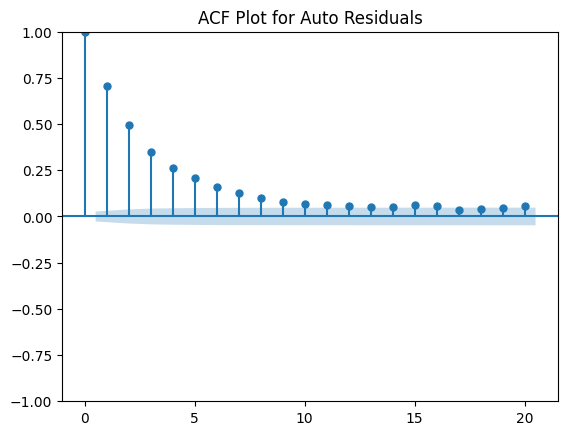

<Figure size 1200x600 with 0 Axes>

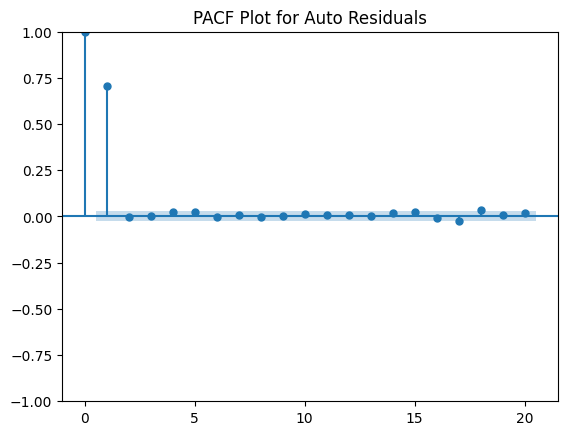

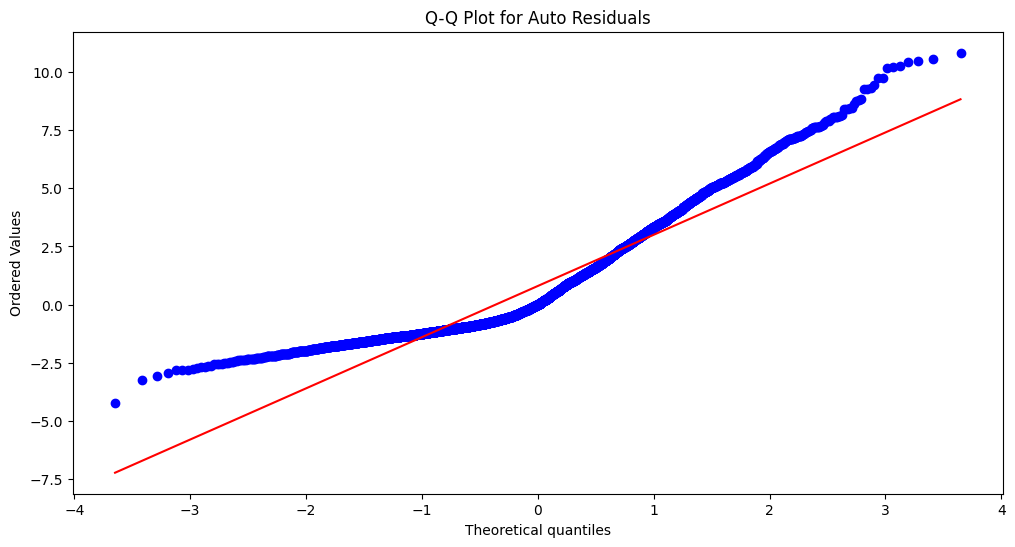

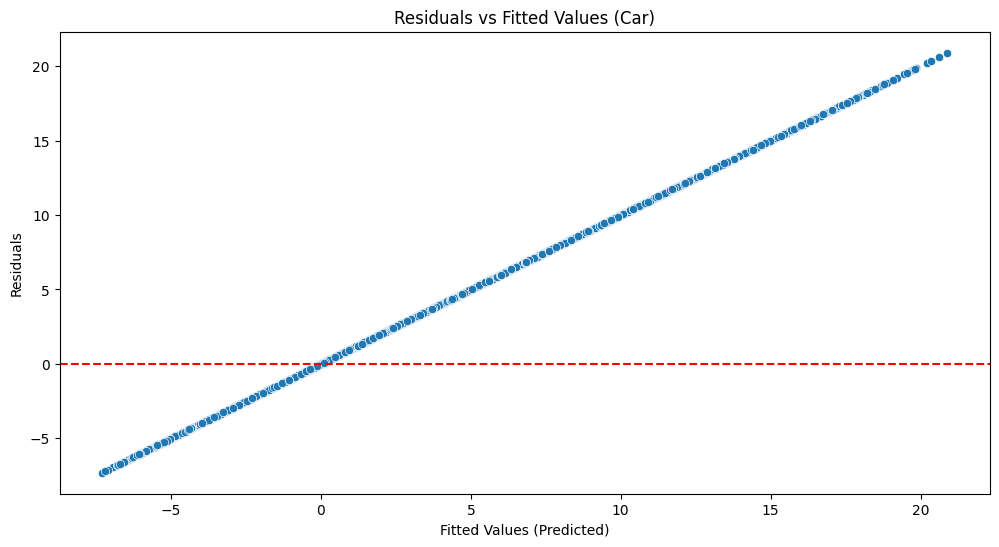

<Figure size 1200x600 with 0 Axes>

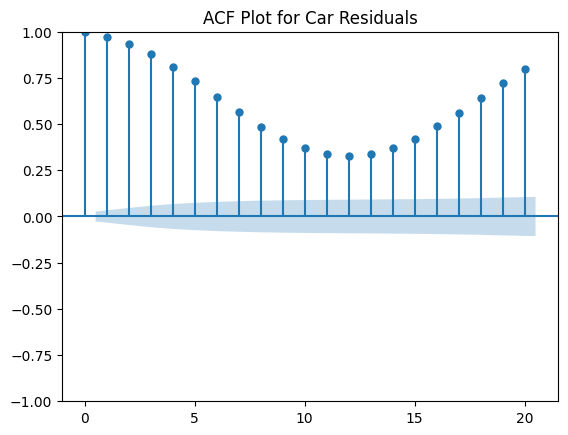

<Figure size 1200x600 with 0 Axes>

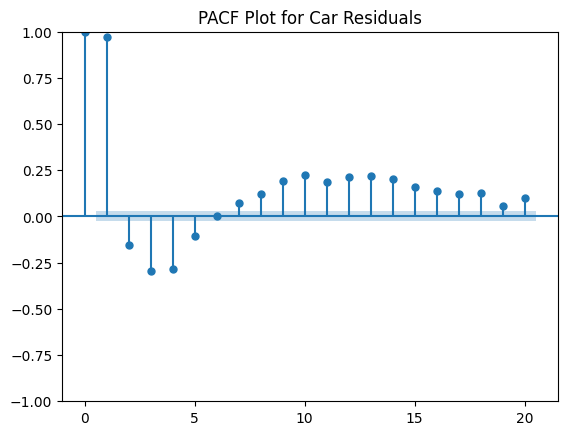

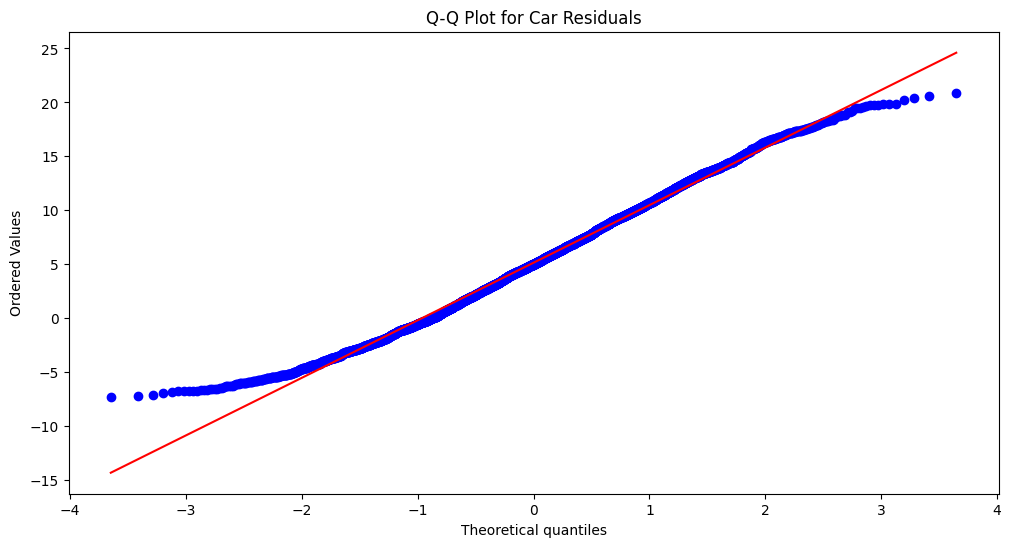

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import scipy.stats as stats

# Load residuals
residuals_df = pd.read_csv('/kaggle/working/residuals.csv')

# 1. Residuals vs. Fitted Values Plot for Bike Residuals
plt.figure(figsize=(12, 6))
sns.scatterplot(x=residuals_df['Residual_bike'], y=residuals_df['Residual_bike'])
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values (Predicted)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values (Bike)')
plt.show()

# 2. ACF and PACF Plots for Residuals of Bike
# ACF Plot for Residuals
plt.figure(figsize=(12, 6))
plot_acf(residuals_df['Residual_bike'], lags=20, title='ACF Plot for Bike Residuals')
plt.show()

# PACF Plot for Residuals
plt.figure(figsize=(12, 6))
plot_pacf(residuals_df['Residual_bike'], lags=20, title='PACF Plot for Bike Residuals', method='ywm')
plt.show()

# Q-Q Plot for Normality of Bike Residuals
plt.figure(figsize=(12, 6))
stats.probplot(residuals_df['Residual_bike'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Bike Residuals')
plt.show()

# 3. Residuals vs. Fitted Values Plot for Auto Residuals
plt.figure(figsize=(12, 6))
sns.scatterplot(x=residuals_df['Residual_auto'], y=residuals_df['Residual_auto'])
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values (Predicted)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values (Auto)')
plt.show()

# ACF Plot for Auto Residuals
plt.figure(figsize=(12, 6))
plot_acf(residuals_df['Residual_auto'], lags=20, title='ACF Plot for Auto Residuals')
plt.show()

# PACF Plot for Auto Residuals
plt.figure(figsize=(12, 6))
plot_pacf(residuals_df['Residual_auto'], lags=20, title='PACF Plot for Auto Residuals', method='ywm')
plt.show()

# Q-Q Plot for Auto Residuals
plt.figure(figsize=(12, 6))
stats.probplot(residuals_df['Residual_auto'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Auto Residuals')
plt.show()

# 4. Residuals vs. Fitted Values Plot for Car Residuals
plt.figure(figsize=(12, 6))
sns.scatterplot(x=residuals_df['Residual_car'], y=residuals_df['Residual_car'])
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values (Predicted)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values (Car)')
plt.show()

# ACF Plot for Car Residuals
plt.figure(figsize=(12, 6))
plot_acf(residuals_df['Residual_car'], lags=20, title='ACF Plot for Car Residuals')
plt.show()

# PACF Plot for Car Residuals
plt.figure(figsize=(12, 6))
plot_pacf(residuals_df['Residual_car'], lags=20, title='PACF Plot for Car Residuals', method='ywm')
plt.show()

# Q-Q Plot for Car Residuals
plt.figure(figsize=(12, 6))
stats.probplot(residuals_df['Residual_car'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Car Residuals')
plt.show()


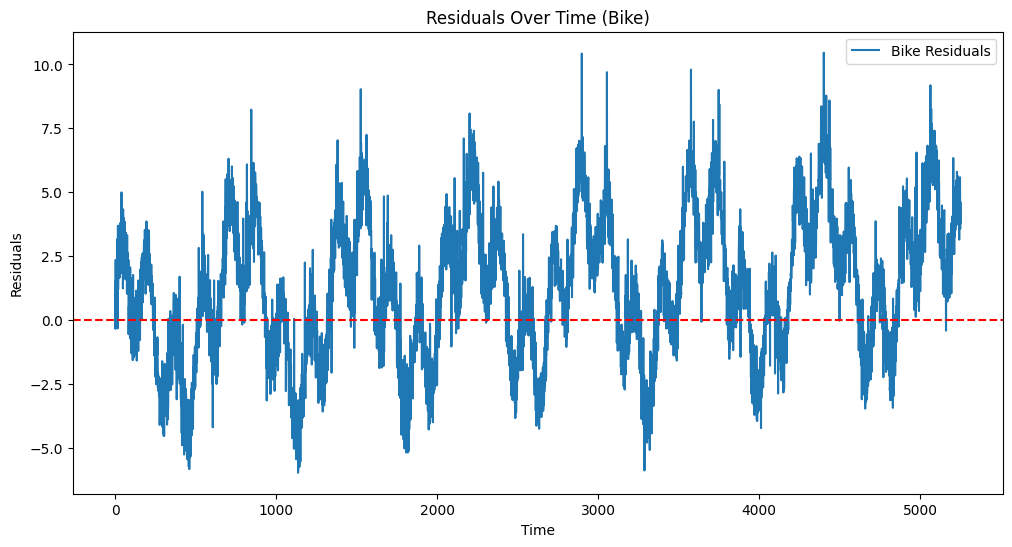

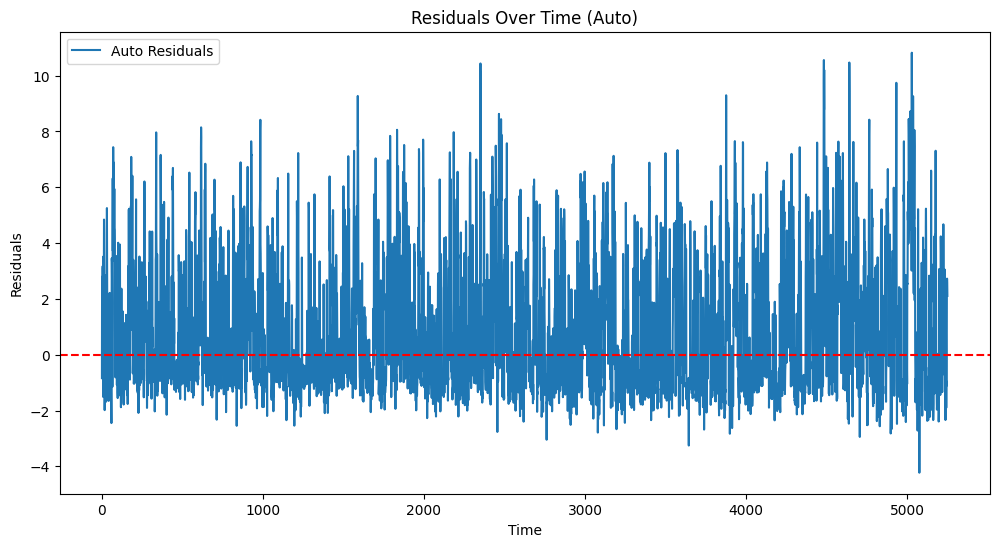

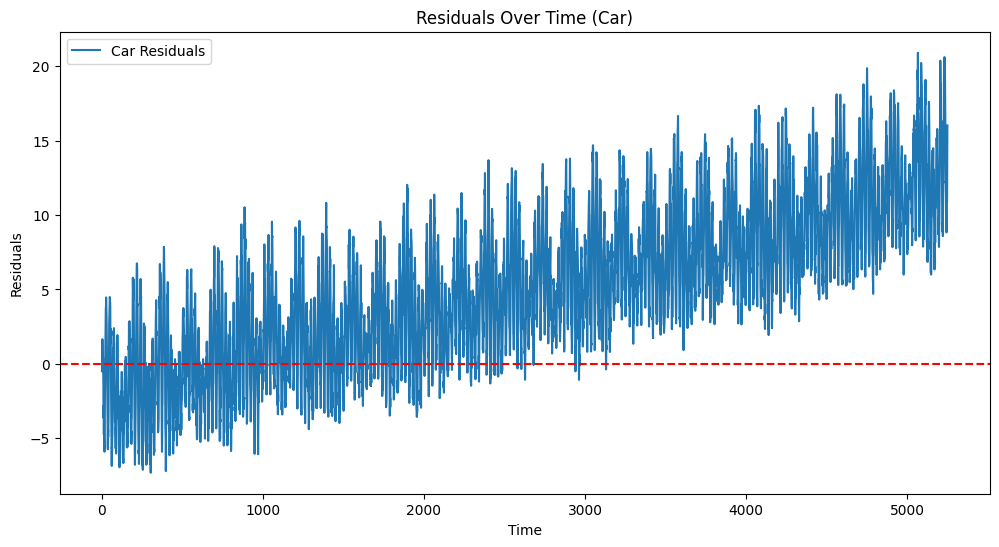

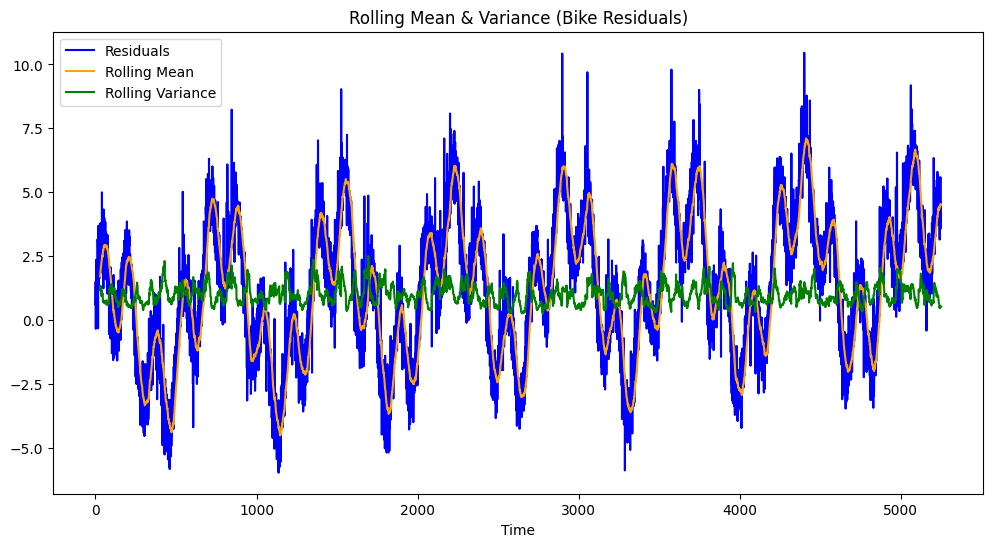

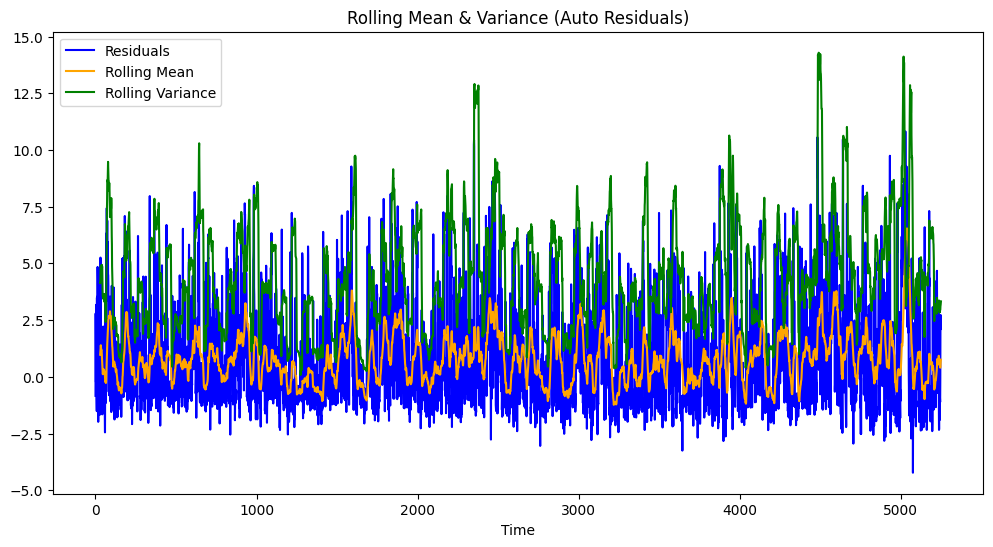

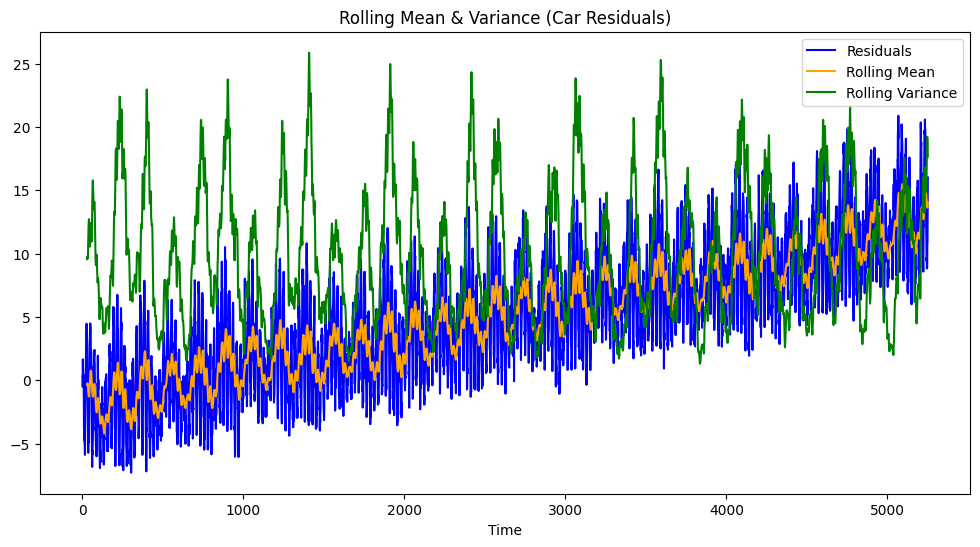

<Figure size 1200x600 with 0 Axes>

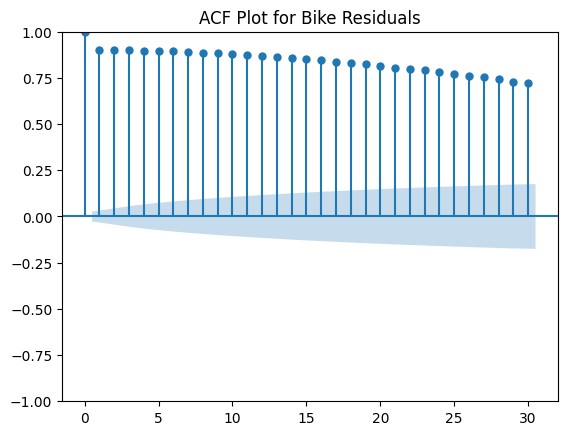

<Figure size 1200x600 with 0 Axes>

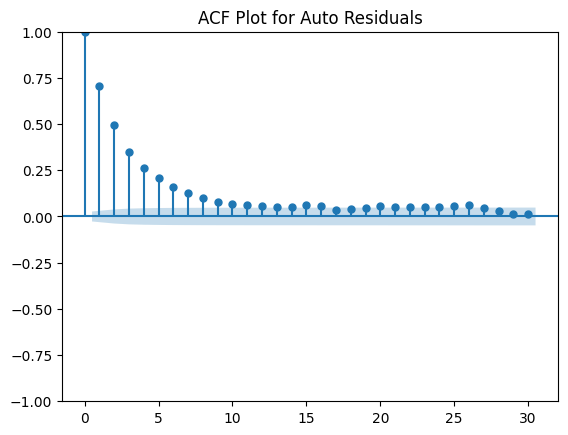

<Figure size 1200x600 with 0 Axes>

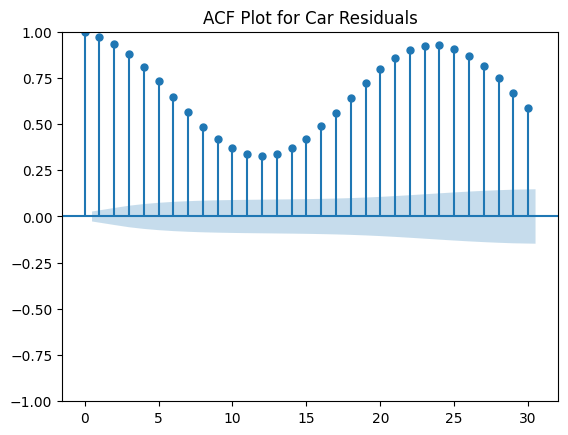

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np

# Load residuals data
residuals_df = pd.read_csv('/kaggle/working/residuals.csv')

# 1. Residuals vs Time Plot

# Plot for 'bike' residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals_df.index, residuals_df['Residual_bike'], label='Bike Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Over Time (Bike)')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Plot for 'auto' residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals_df.index, residuals_df['Residual_auto'], label='Auto Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Over Time (Auto)')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Plot for 'car' residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals_df.index, residuals_df['Residual_car'], label='Car Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Over Time (Car)')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# 2. Rolling Mean and Variance (to check for heteroscedasticity)
window_size = 30

# Rolling mean and variance for 'bike' residuals
rolling_mean_bike = residuals_df['Residual_bike'].rolling(window=window_size).mean()
rolling_var_bike = residuals_df['Residual_bike'].rolling(window=window_size).var()

plt.figure(figsize=(12, 6))
plt.plot(residuals_df.index, residuals_df['Residual_bike'], color='blue', label='Residuals')
plt.plot(rolling_mean_bike, color='orange', label='Rolling Mean')
plt.plot(rolling_var_bike, color='green', label='Rolling Variance')
plt.title('Rolling Mean & Variance (Bike Residuals)')
plt.xlabel('Time')
plt.legend()
plt.show()

# Rolling mean and variance for 'auto' residuals
rolling_mean_auto = residuals_df['Residual_auto'].rolling(window=window_size).mean()
rolling_var_auto = residuals_df['Residual_auto'].rolling(window=window_size).var()

plt.figure(figsize=(12, 6))
plt.plot(residuals_df.index, residuals_df['Residual_auto'], color='blue', label='Residuals')
plt.plot(rolling_mean_auto, color='orange', label='Rolling Mean')
plt.plot(rolling_var_auto, color='green', label='Rolling Variance')
plt.title('Rolling Mean & Variance (Auto Residuals)')
plt.xlabel('Time')
plt.legend()
plt.show()

# Rolling mean and variance for 'car' residuals
rolling_mean_car = residuals_df['Residual_car'].rolling(window=window_size).mean()
rolling_var_car = residuals_df['Residual_car'].rolling(window=window_size).var()

plt.figure(figsize=(12, 6))
plt.plot(residuals_df.index, residuals_df['Residual_car'], color='blue', label='Residuals')
plt.plot(rolling_mean_car, color='orange', label='Rolling Mean')
plt.plot(rolling_var_car, color='green', label='Rolling Variance')
plt.title('Rolling Mean & Variance (Car Residuals)')
plt.xlabel('Time')
plt.legend()
plt.show()

# 3. ACF Plot (to check for any remaining autocorrelation or cyclic patterns)
plt.figure(figsize=(12, 6))
plot_acf(residuals_df['Residual_bike'], lags=30, title='ACF Plot for Bike Residuals')
plt.show()

plt.figure(figsize=(12, 6))
plot_acf(residuals_df['Residual_auto'], lags=30, title='ACF Plot for Auto Residuals')
plt.show()

plt.figure(figsize=(12, 6))
plot_acf(residuals_df['Residual_car'], lags=30, title='ACF Plot for Car Residuals')
plt.show()


The graphs and what they indicate:

scatter plot of bike residuals vs. fitted values - It exhibits a distinct curvilinear pattern, suggesting the model is missing a nonlinear component that could better capture the relationship.

residuals vs. fitted values plot for auto - It shows a clear linear relationship, showing the model is effectively capturing the underlying patterns.

residuals vs. fitted values plot for car - It also displays a linear relationship, with no evident nonlinearities or heteroscedasticity concerns.

autocorrelation plot for bike residuals - It shows a high degree of positive autocorrelation, suggesting the model is missing important factors contributing to the bike residuals.

autocorrelation plot for auto residuals - It displays a quicker decline in autocorrelation compared to bike, indicating the auto model is better capturing the temporal dynamics.

autocorrelation plot for car residuals - It shows a rapid decline to near-zero, demonstrating the car model is effectively accounting for the temporal structure.

PACF plot for bike residuals - It shows significant spikes at multiple lags, further confirming the presence of uncaptured temporal dependencies in the bike data.

PACF plot for auto residuals - It indicates minimal remaining partial autocorrelation, suggesting the model has effectively captured the temporal structure.

PACF plot for car residuals - It has an even quicker decline in partial autocorrelation compared to auto, showing excellent modeling of the temporal structure.

bike residuals over time - It shows significant volatility and clustering of large positive and negative values, pointing to temporal dependencies not fully captured by the current model.

auto residuals over time - Highly volatile auto residuals indicate unstable model performance.

car residuals over time - Substantial variability in car residuals suggests inconsistent model behavior.

bike residuals over rolling mean and variance - Fluctuating rolling mean and variance for bike residuals imply model instability.

auto residuals over rolling mean and variance - Auto residual metrics exhibit high volatility, pointing to unreliable model performance.

car residuals over rolling mean and variance - Large spikes and dips in car residual metrics signal inconsistent model quality.

The residuals from the model show the following:

non-zero Mean - The residuals for all variables have non-zero means, suggesting the model may have some bias, consistently underestimating or overestimating the target.

non-normal Distribution - The kolmogorov-smirnov test indicates that the residuals are not normally distributed, which is common but may require attention depending on model assumptions.

autocorrelation - The ljung box test shows significant autocorrelation in the residuals, suggesting that the model has not fully captured temporal dependencies in the data.

The auto and car models show positive signs, with linear relationships between residuals and fitted values, and minimal remaining autocorrelation structure, suggesting they effectively capture the underlying patterns and temporal dynamics.

In contrast, the bike model exhibits more challenges, with nonlinear patterns, heteroscedasticity, and substantial uncaptured temporal dependencies in the residuals. The residuals over time also display significant volatility and clustering.

Further examination of the residuals over time and the rolling mean and variance reveals highly variable and unstable performance across all three models - auto, car, and bike. This indicates the need to refine the underlying models to improve their stability and reliability.

Overall, the auto and car models appear relatively well, while the bike model requires more work to address the identified issues. There are ways to enhance the consistency and stability of all three models based on the diagnostic plot patterns observed.



Patterns and features missed by the original models:

nonlinearity in the bike model - The curvilinear trend in the bike residuals vs. fitted values plot suggests the model is missing an important nonlinear component.

temporal dependencies in the bike model - The high degree of autocorrelation and significant partial autocorrelation spikes in the bike residuals show the model is not fully accounting for temporal structure in the data.

inconsistent model performance: The volatile residuals over time and rolling mean and variance plots across all three models point to unstable and unreliable model behavior.

To improve the models:

bike model - Explore nonlinear transformations or more flexible modeling techniques like generalized additive models to capture the nonlinear relationships. Incorporate lagged variables or time series components to better model the temporal dependencies in the bike data.

auto and car models - Investigate the sources of the observed volatility in model performance over time. Consider techniques like rolling window model fitting or time-varying coefficient models to improve stability.

for all models - Investigate the underlying causes of the non-zero mean residuals, non-normal distributions, and autocorrelation. Validate the model assumptions more thoroughly and make necessary adjustments.

